This is the second part of project. Please refer to part 1 for information on how the dataset was collected and cleaned. 

In [ ]:
# Optional - causes longer run times
# The data frame that will be used has 120 columns to start with and I want to be able to see all of them
pd.set_option("display.max_columns", None)

# Also, to see all rows
pd.set_option('display.max_rows', None)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Initial Feature Selection & Data Transformation

As shown below, this current dataset has 1,162 observations and 115 (numerical) features currently, so there is a further need to preprocess the data further. Here is what the following process will look like:

- For some initial feature selection, I will employ a basic filter method: eliminate all redundant features as defined by having a Pearson's Correlation Coefficient value of over 0.98 (absolute value). This value is set semi-arbitrarily high because the purpose is to eliminate features that are completely explained (correlation coefficient = 1/-1) but some of the rate statistics have been rounded, so I'm using the value 0.98.

- Next, an examination of the distributions of features will be done to determine whether there should be any transformations done to highly-skewed data.

In [2]:
# Read in data
df = pd.read_csv('NBA_FINAL_DATA.csv', index_col=0)

df

,PLAYER,TEAM,AGE,GP,PTS,FGM,FGA,FG%,3PM,3PA,...,CATCHSHOOT_PTS,CATCHSHOOT_FG%,PULLUP_PTS,PULLUP_FG%,PAINTTOUCH_PTS,PAINTTOUCH_FG%,POSTTOUCH_PTS,POSTTOUCH_FG%,ELBOWTOUCH_PTS,ELBOWTOUCH_FG%
JoelEmbiid|2022,JoelEmbiid,PHI,28,68,30.6,9.8,19.6,49.9,1.4,3.7,...,4.8,40.6,6.5,41.1,5.8,62.3,6.5,47.1,3.6,55.7
JoelEmbiid|2021,JoelEmbiid,PHI,27,51,28.5,9.0,17.6,51.3,1.1,3.0,...,5.3,43.7,5.3,45.6,5.5,62.0,8.6,56.6,2.3,53.4
JoelEmbiid|2020,JoelEmbiid,PHI,26,51,23.0,7.5,15.7,47.7,1.1,3.4,...,5.2,38.9,2.5,33.0,7.0,65.7,7.4,53.0,2.1,43.5
LeBronJames|2022,LeBronJames,LAL,37,56,30.3,11.4,21.8,52.4,2.9,8.0,...,5.3,37.7,6.6,37.4,4.4,74.7,2.3,56.7,2.5,82.2
LeBronJames|2021,LeBronJames,LAL,36,45,25.0,9.4,18.3,51.3,2.3,6.3,...,3.3,35.8,6.9,38.2,2.3,73.8,1.7,45.2,1.3,66.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TreveonGraham|2020,TreveonGraham,ATL,26,55,4.4,1.6,4.4,36.0,0.6,2.2,...,1.6,25.9,0.3,33.3,0.9,51.4,0.0,0.0,0.1,60.0
TroyDaniels|2020,TroyDaniels,DEN,28,47,4.3,1.5,4.0,38.7,1.0,2.8,...,2.1,37.9,1.1,38.2,0.2,50.0,0.0,0.0,0.2,66.7
VinceCarter|2020,VinceCarter,ATL,43,60,5.0,1.8,5.1,35.2,1.0,3.4,...,2.5,28.6,1.3,44.4,0.2,55.6,0.3,60.0,0.2,37.5
WilsonChandler|2020,WilsonChandler,BKN,33,35,5.9,2.1,5.2,40.4,1.1,3.5,...,3.1,31.9,0.5,42.1,0.2,50.0,0.0,0.0,0.2,60.0


In [3]:
display(df.info())

display(df.shape)

<class 'pandas.core.frame.DataFrame'>
Index: 1162 entries, JoelEmbiid|2022 to YogiFerrell|2020
Columns: 120 entries, PLAYER to ELBOWTOUCH_FG%
dtypes: float64(111), int64(6), object(3)
memory usage: 1.1+ MB


None

(1162, 120)

In [4]:
# Check for nulls
df.isnull().sum()

PLAYER            0
TEAM              0
AGE               0
GP                0
PTS               0
                 ..
PAINTTOUCH_FG%    0
POSTTOUCH_PTS     0
POSTTOUCH_FG%     0
ELBOWTOUCH_PTS    0
ELBOWTOUCH_FG%    0
Length: 120, dtype: int64

In [5]:
# Check for duplicate rows
df.duplicated().sum()

0

The data frame has 1162 observations and 120 features. The primary concern here is the curse of dimensionality; this is going to be address later with dimensionality reduction. However, before moving on to that step, I want to look at and study the dataset first. Before moving forward, I want to instantiate the features variable, X, with only numerical columns (also without age, games played).

In [6]:
X = df.drop(['PLAYER', 'TEAM', 'AGE', 'GP', 'POSITION'], axis=1)

X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1162 entries, JoelEmbiid|2022 to YogiFerrell|2020
Columns: 115 entries, PTS to ELBOWTOUCH_FG%
dtypes: float64(111), int64(4)
memory usage: 1.0+ MB


Having 115 features is definitely going to cause any sort of correlation heatmap to be an inefficient way of looking at heavily correlated features. However, I will create one just for visualization purposes which will give us a visual, high-level overview of what the correlation coefficients between the features look like where the absolute value of the correlation coefficients are greater than 0.98.

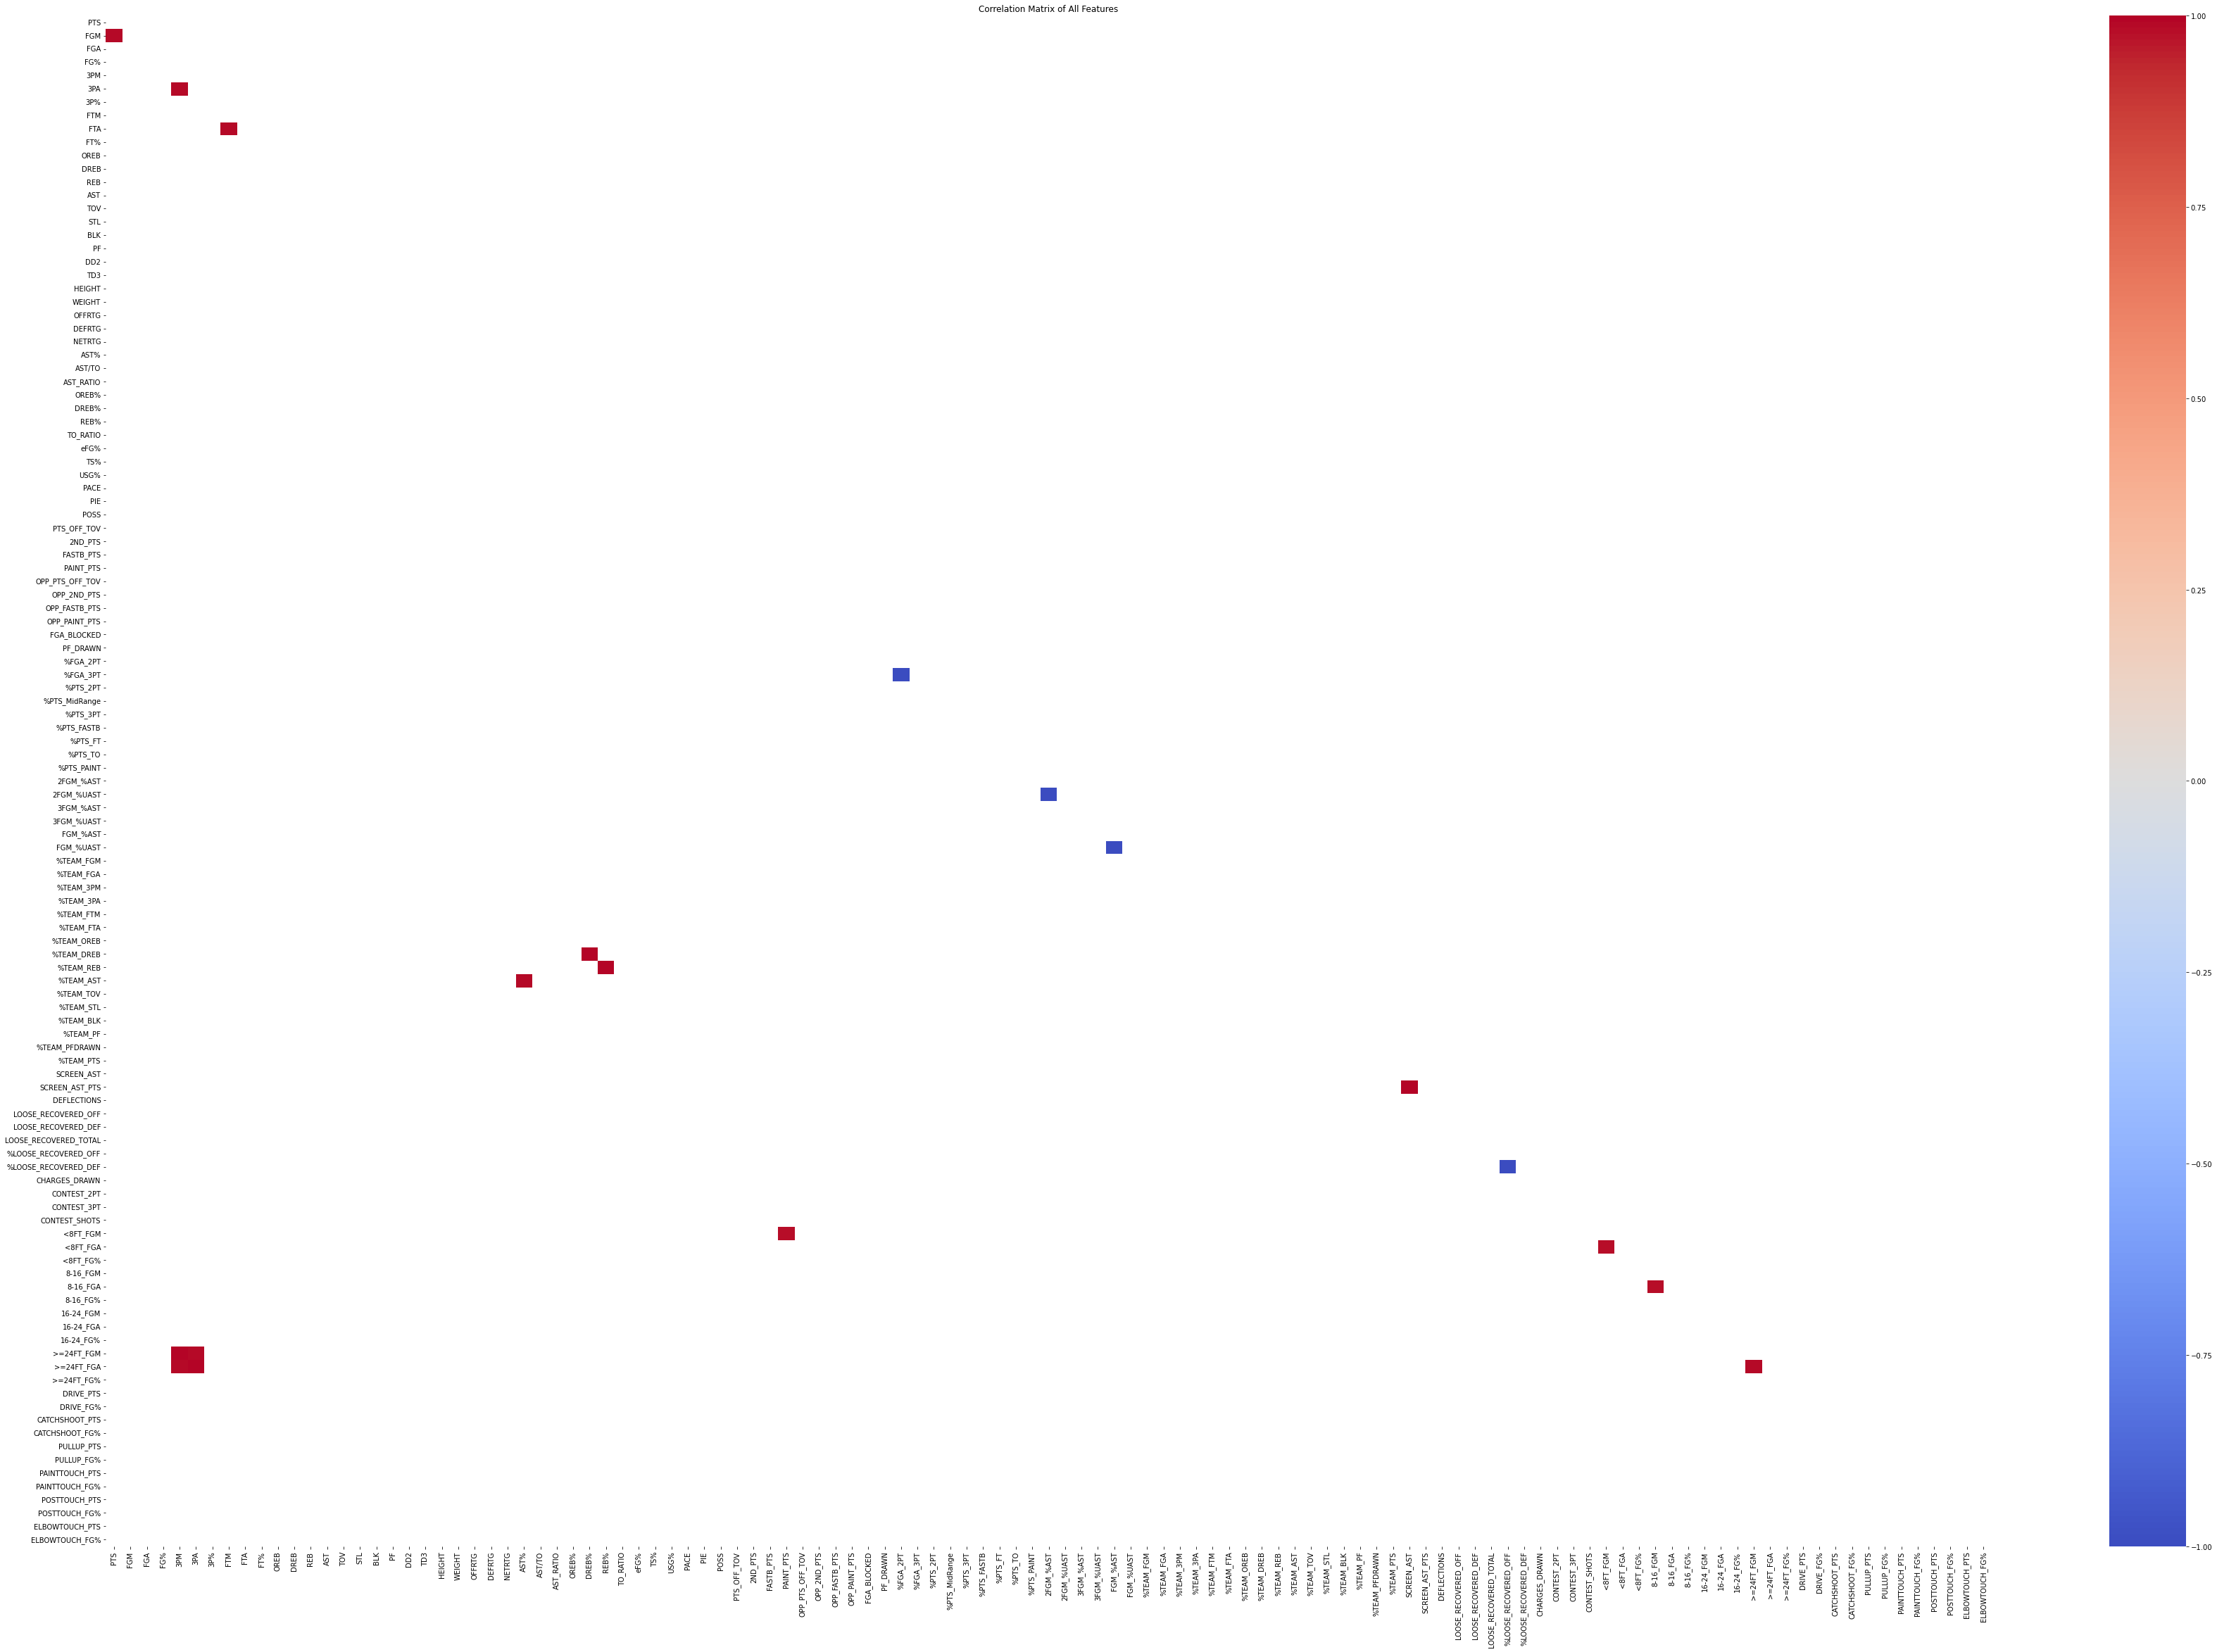

In [7]:
plt.figure(figsize=(60,40))
mask = np.triu(np.ones_like(X.corr()))
sns.heatmap(X.corr()[abs(X.corr())>=.98], mask=mask, vmin=-1, vmax=1, cmap='coolwarm')
plt.title('Correlation Matrix of All Features')
plt.show()

From the visual above, there doesn't seem to be an overly large amount of redundant features (as defined by correlation > 0.98 mentioned above). I will take a look at all the columns and then select features to drop; of the pair of features who shared 0.98 correlation, I will personally decide which feature to drop. This decision will be made based off interpretability; for example (as seen below), between >=24FT_FGA and 3PA, I will drop the former because the latter name is more interpretable and used more often.

In [8]:
corr = X.corr()

corr.shape

corr.abs().unstack().sort_values(ascending=False).drop_duplicates().head(50)

PTS                   PTS                     1.000000
%FGA_3PT              %FGA_2PT                1.000000
FGM_%UAST             FGM_%AST                1.000000
2FGM_%UAST            2FGM_%AST               1.000000
%LOOSE_RECOVERED_OFF  %LOOSE_RECOVERED_DEF    0.999999
>=24FT_FGA            3PA                     0.999770
>=24FT_FGM            3PM                     0.999758
SCREEN_AST_PTS        SCREEN_AST              0.998106
DREB%                 %TEAM_DREB              0.995104
REB%                  %TEAM_REB               0.994508
PTS                   FGM                     0.988055
FTM                   FTA                     0.985440
>=24FT_FGA            >=24FT_FGM              0.985422
3PM                   >=24FT_FGA              0.985408
                      3PA                     0.985292
>=24FT_FGM            3PA                     0.985203
%TEAM_AST             AST%                    0.985117
<8FT_FGM              PAINT_PTS               0.984044
8-16_FGA  

In [9]:
# Dropping features 
X = X.drop(['%FGA_2PT', 'FGM_%AST', '2FGM_%AST', '%LOOSE_RECOVERED_OFF', '>=24FT_FGA', '>=24FT_FGM', 'SCREEN_AST_PTS', 
            '%TEAM_DREB', '%TEAM_REB', 'FGM', 'FTM', '3PM', '%TEAM_AST', '<8FT_FGM', '8-16_FGM'], axis=1)

# Check number of features left
X.shape

(1162, 100)

Next, I will check the distributions of the features and determine whether transformation should be applied. To determine whether a feature is heavily skewed, I will utilize a threshold: if abs(mean) >= abs(1.25 * median), then heavily skewed to the right and if abs(mean) <= abs(0.75 * median), then heavily skewed to the left. Before I check, I want to visualize the distributions for all features as well.

In [10]:
# Function code modified from one provided by BrainStation
def hist_create(df,column,transform = lambda x: x):

    plt.figure()
    plt.hist(transform(df[column]))
    plt.title(f"histogram of {column}")
    plt.show()

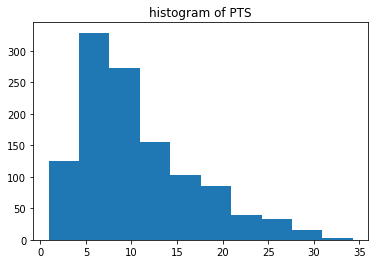

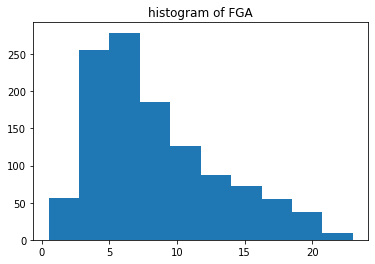

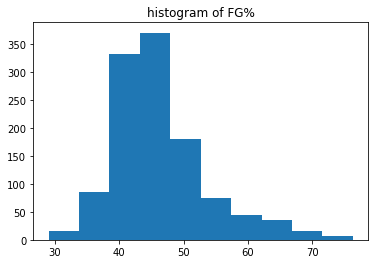

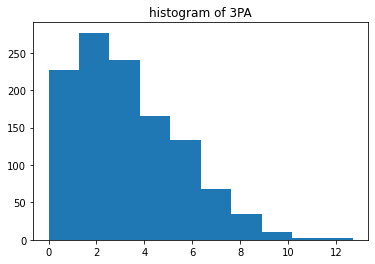

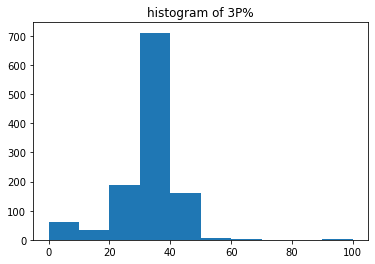

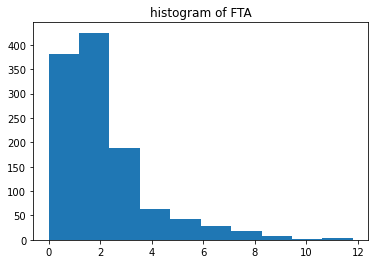

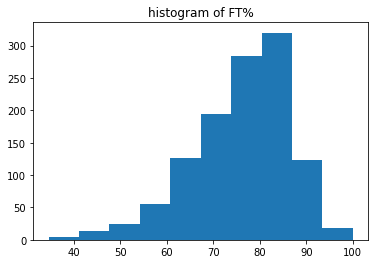

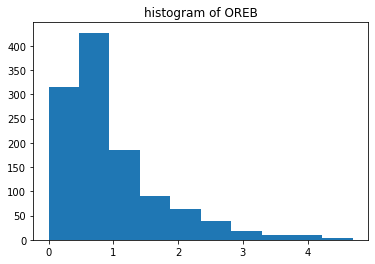

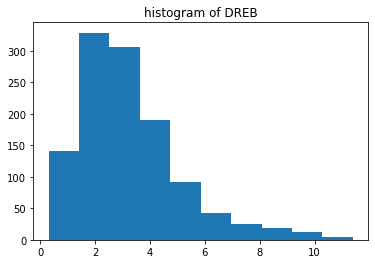

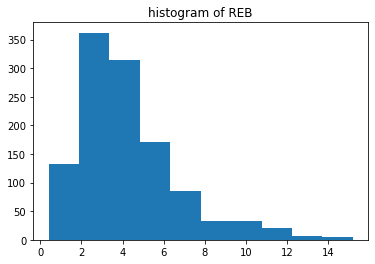

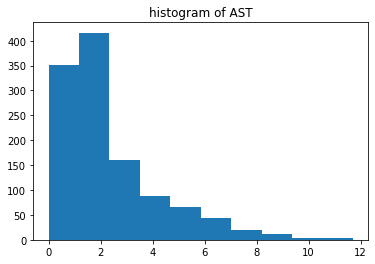

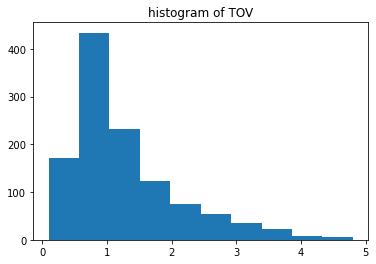

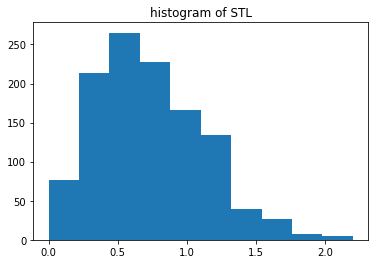

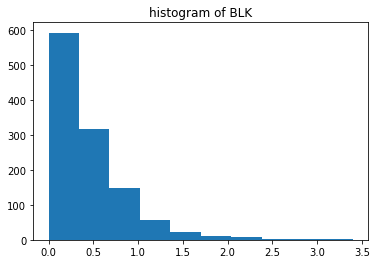

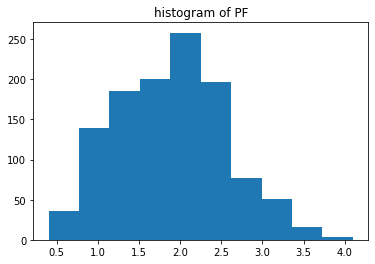

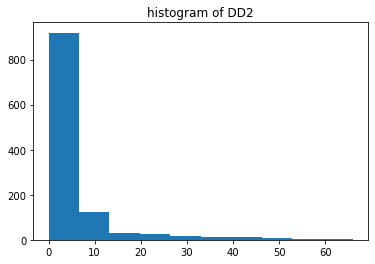

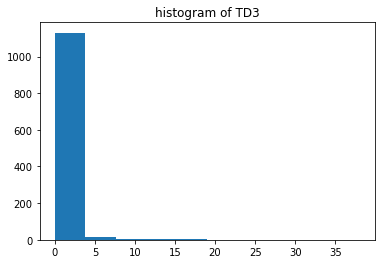

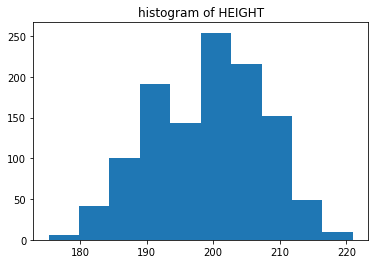

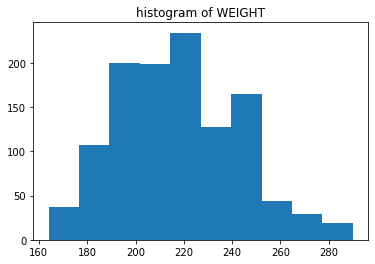

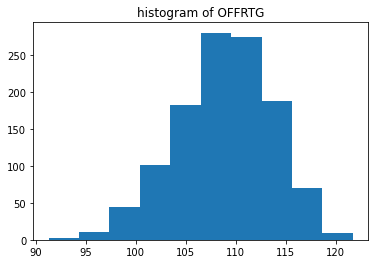

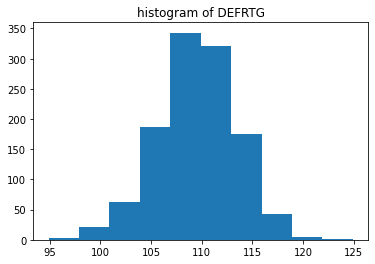

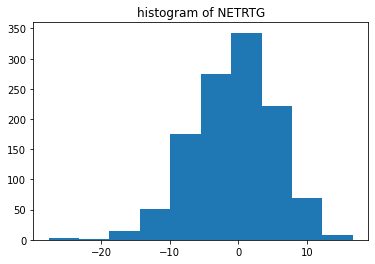

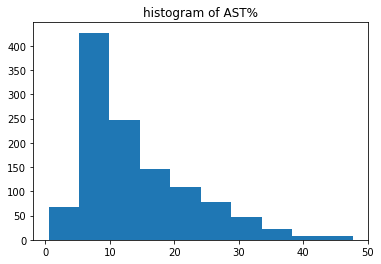

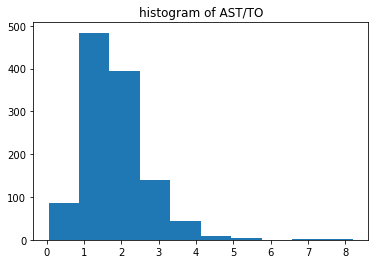

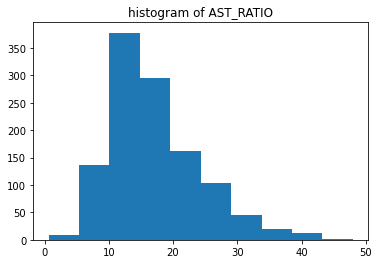

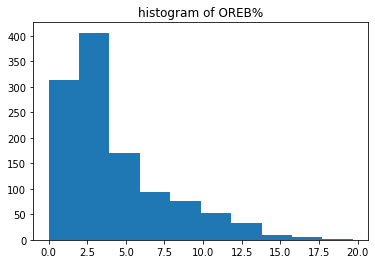

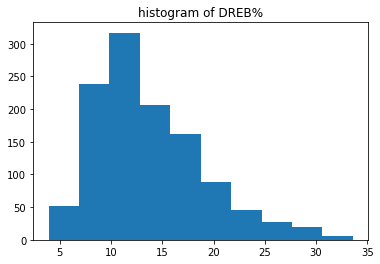

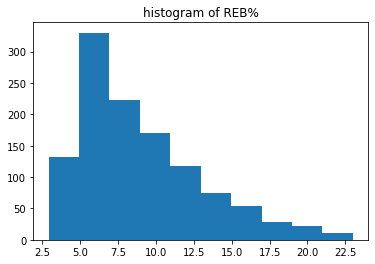

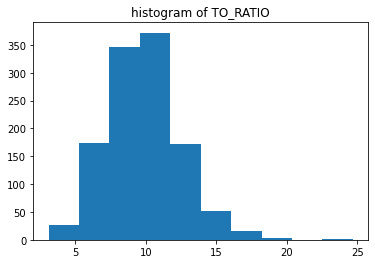

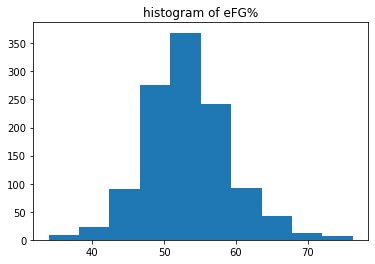

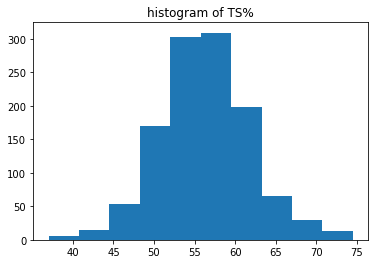

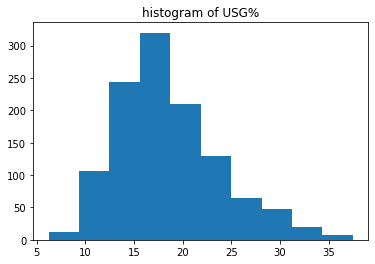

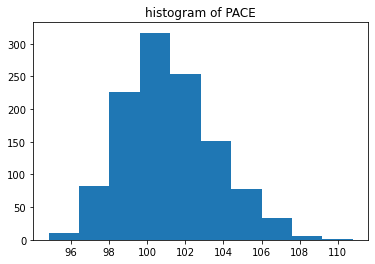

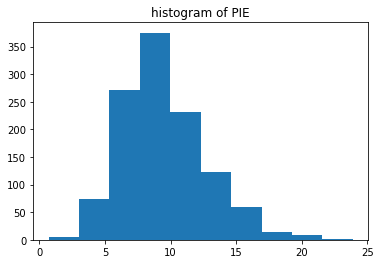

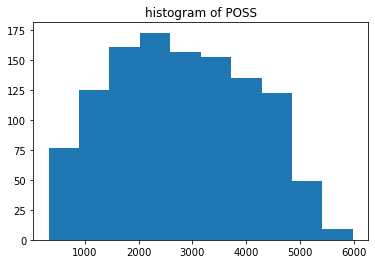

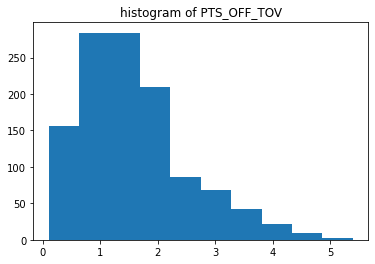

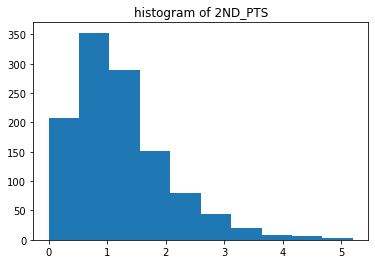

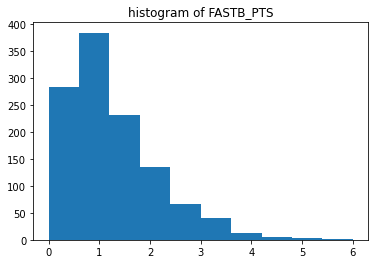

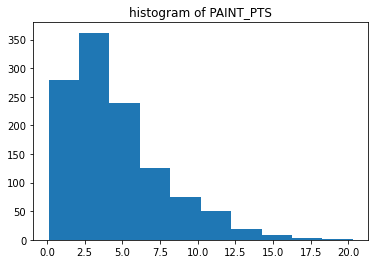

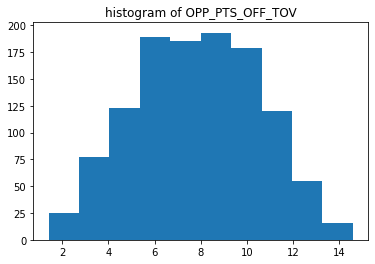

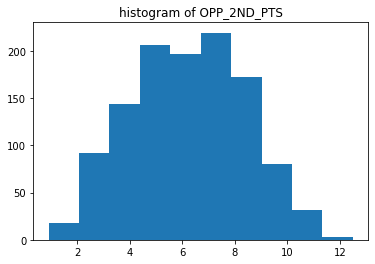

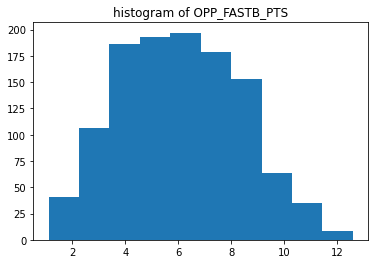

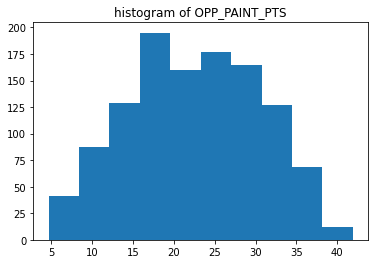

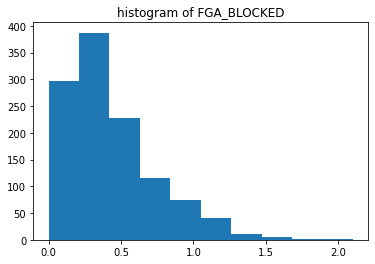

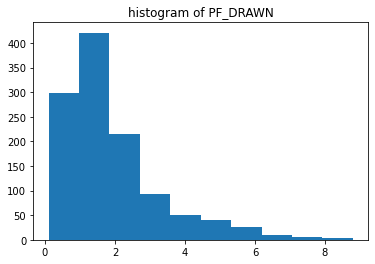

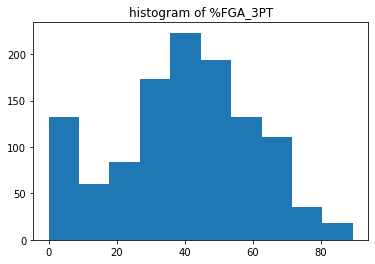

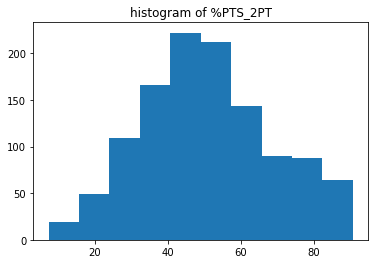

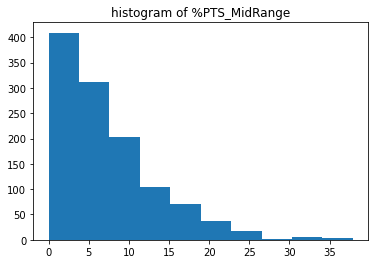

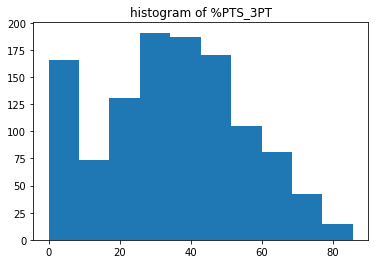

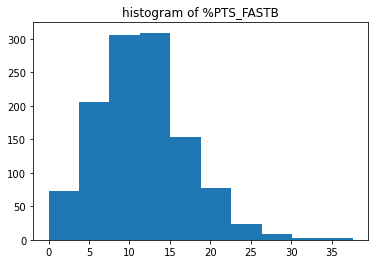

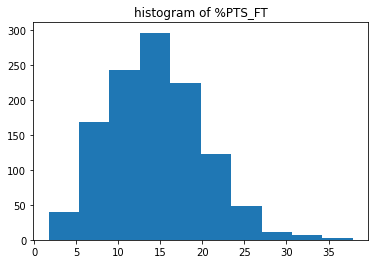

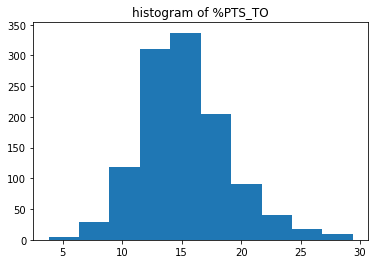

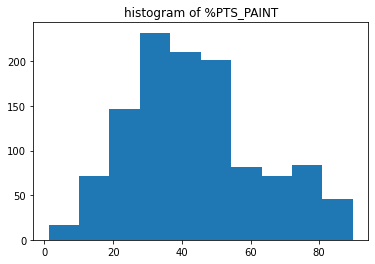

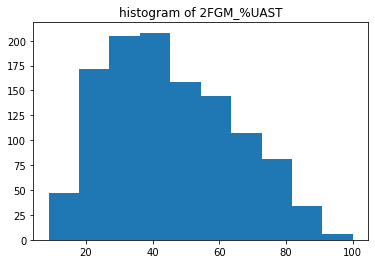

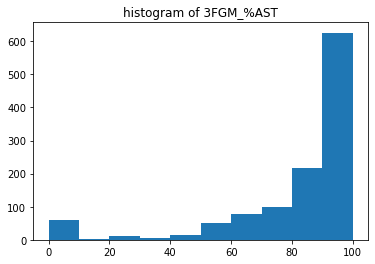

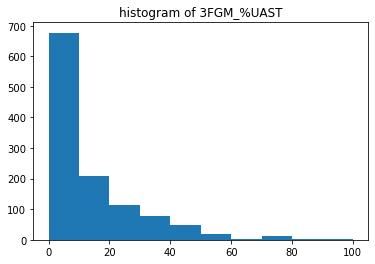

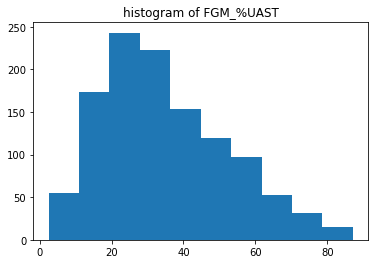

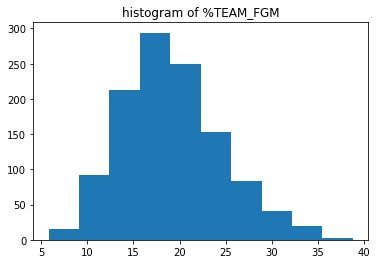

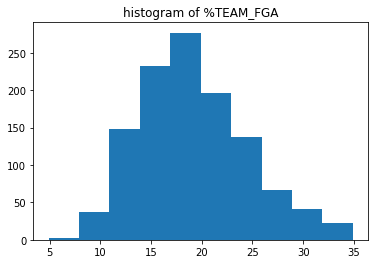

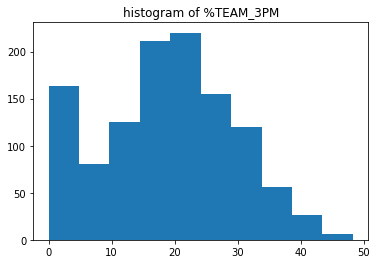

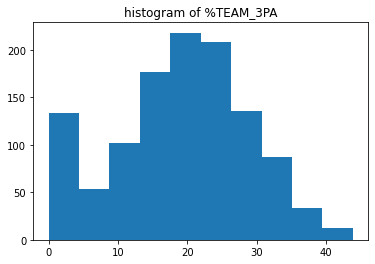

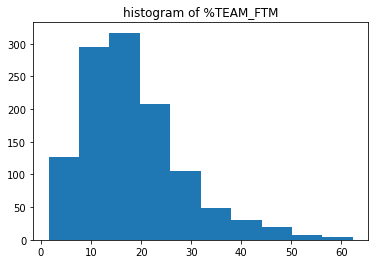

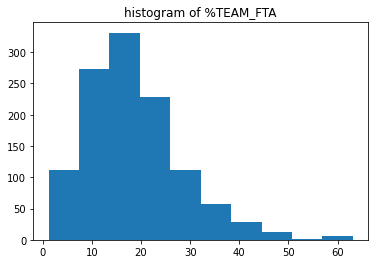

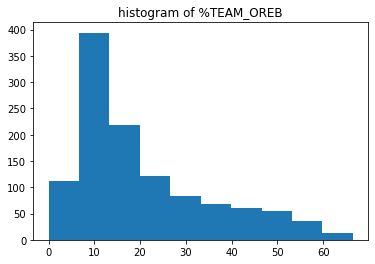

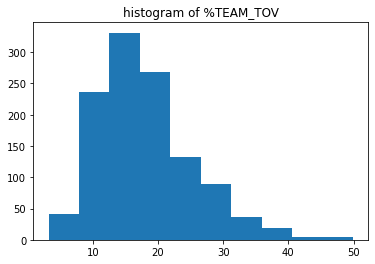

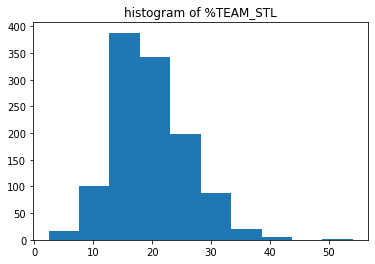

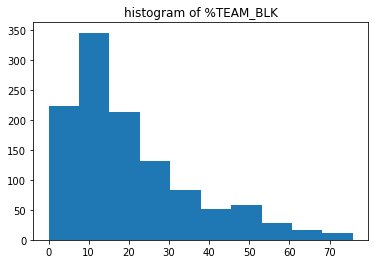

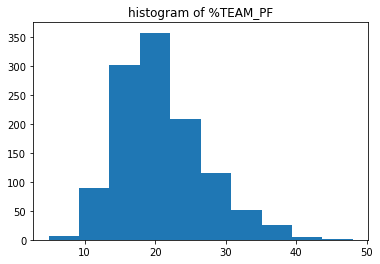

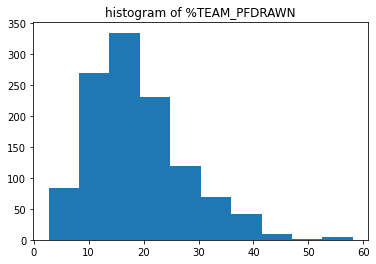

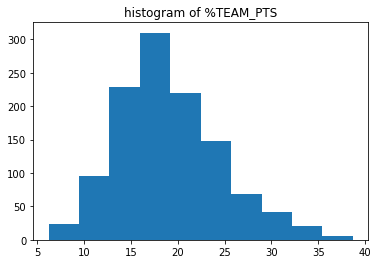

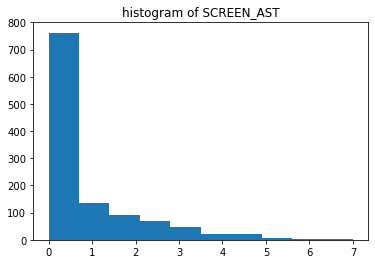

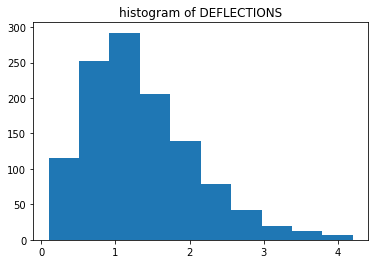

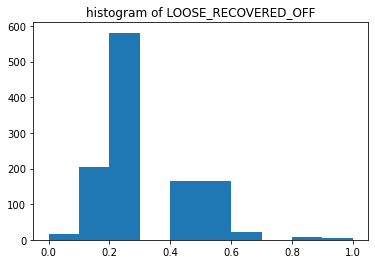

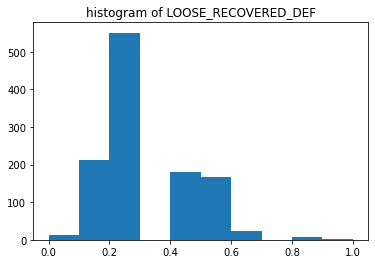

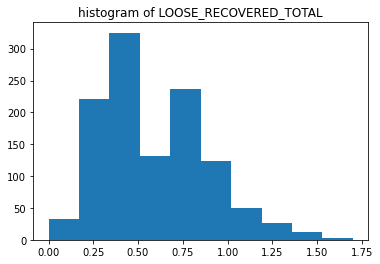

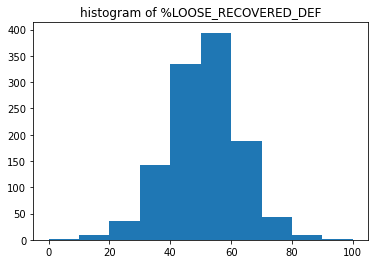

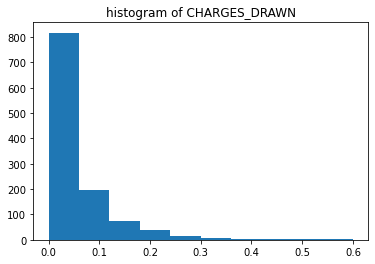

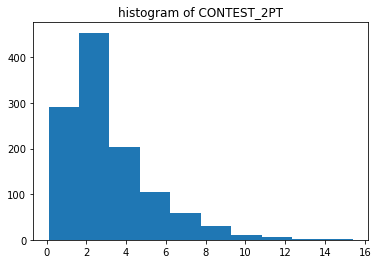

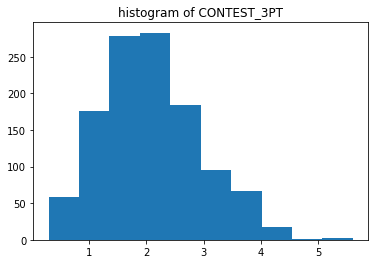

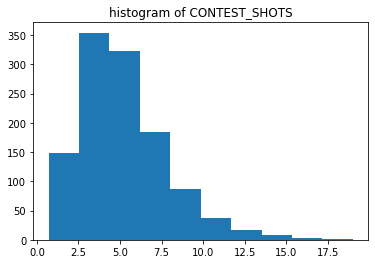

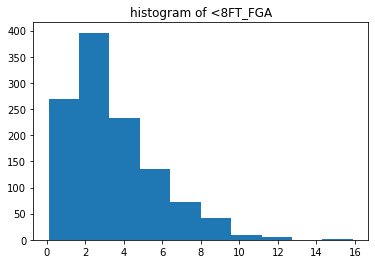

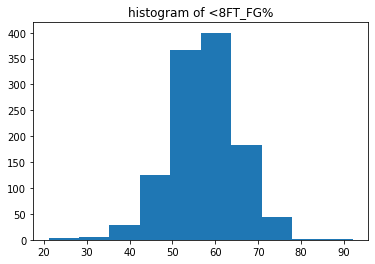

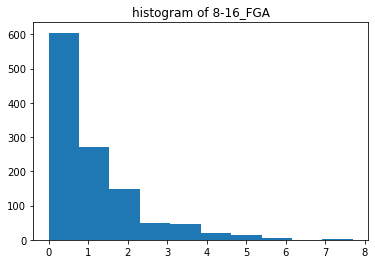

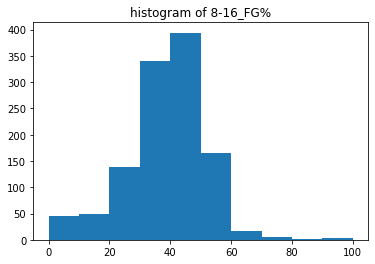

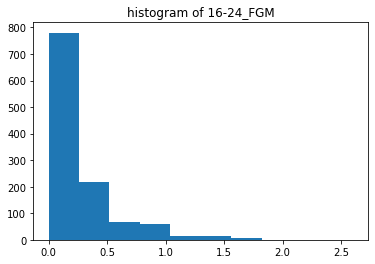

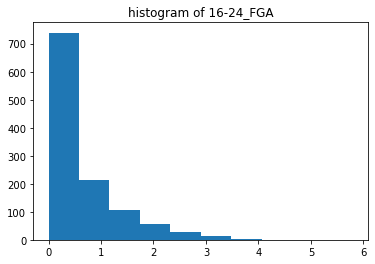

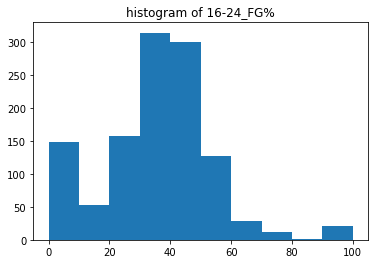

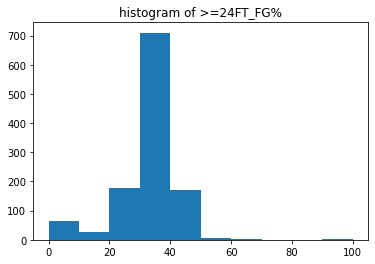

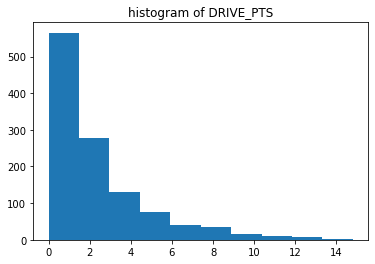

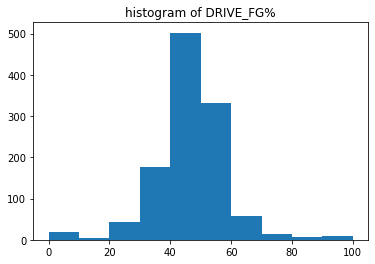

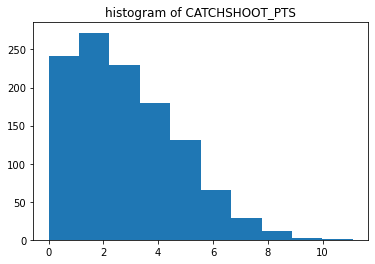

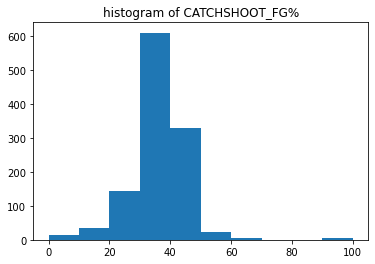

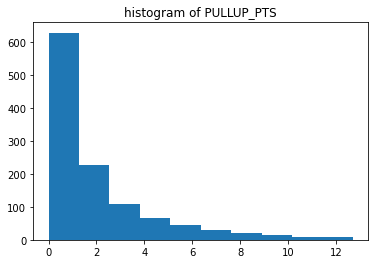

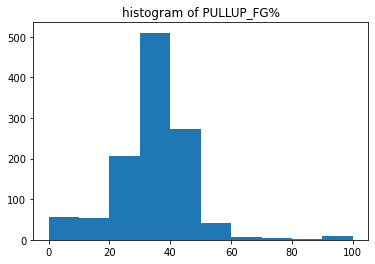

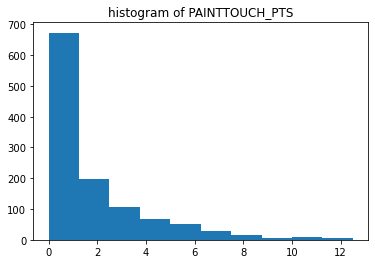

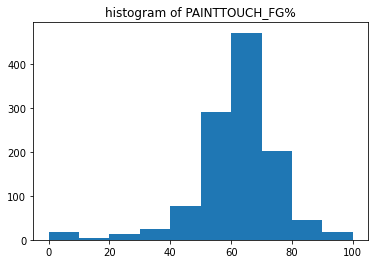

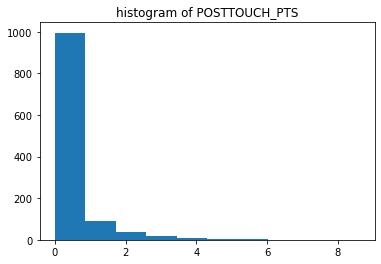

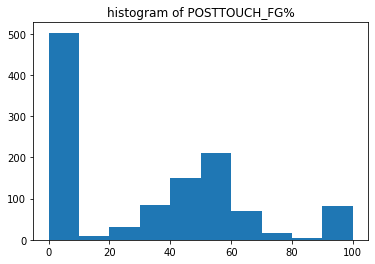

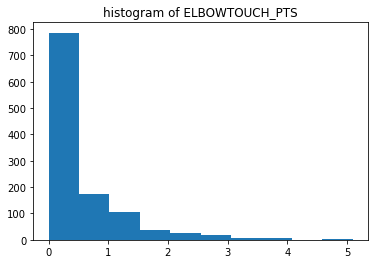

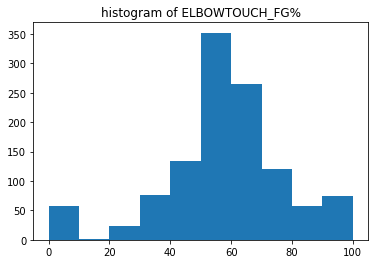

In [11]:
for column in X.columns:
    
    hist_create(X,column)

In [12]:
right_skewed = [column for column in X.columns if X[column].mean() >= 1.25*X[column].median()]

print(f'Number of Right Skewed Features: {len(right_skewed)}')

print(f'Right Skewed Columns: {right_skewed}')

Number of Right Skewed Features: 24
Right Skewed Columns: ['FTA', 'OREB', 'AST', 'TOV', 'BLK', 'DD2', 'TD3', 'AST%', 'OREB%', 'PF_DRAWN', '%PTS_MidRange', '3FGM_%UAST', '%TEAM_OREB', '%TEAM_BLK', 'SCREEN_AST', 'CHARGES_DRAWN', '8-16_FGA', '16-24_FGM', '16-24_FGA', 'DRIVE_PTS', 'PULLUP_PTS', 'PAINTTOUCH_PTS', 'POSTTOUCH_PTS', 'ELBOWTOUCH_PTS']


In [13]:
not_right_skewed = [column for column in X.columns if column not in right_skewed]
print(f'Number of non-right skewed features: {len(not_right_skewed)}')

Number of non-right skewed features: 76


For right-skewed data, I will consider applying log transformation. Before applying any actual transformation, using the create_hist function from earlier, visualize what a log transformation will look like for the features that are heavily right skewed.

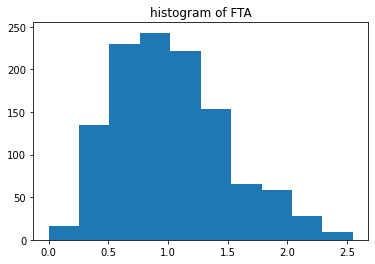

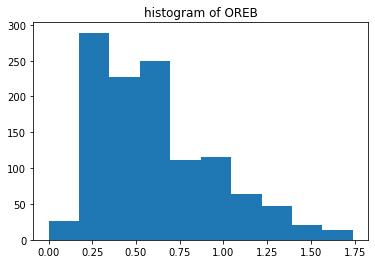

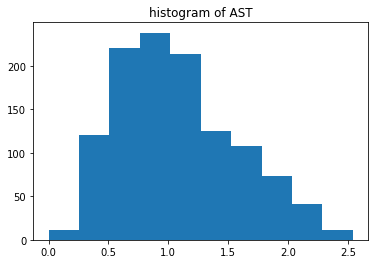

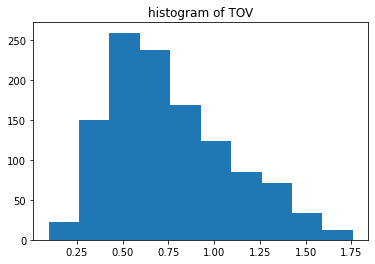

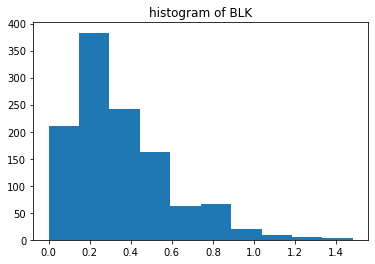

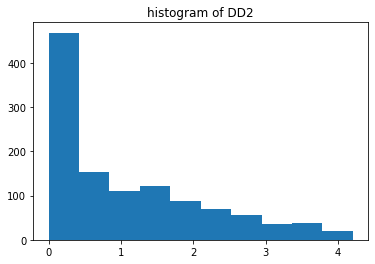

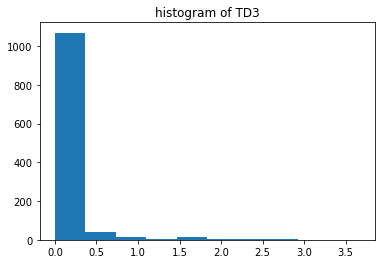

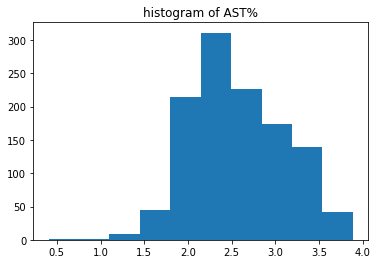

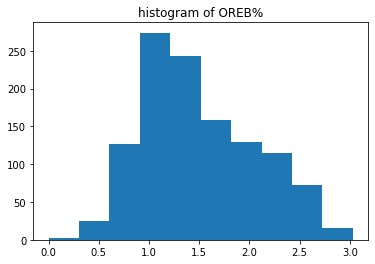

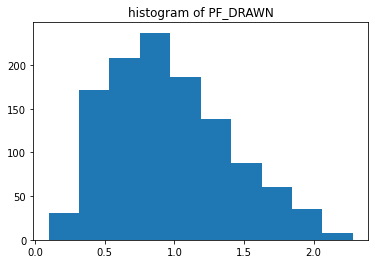

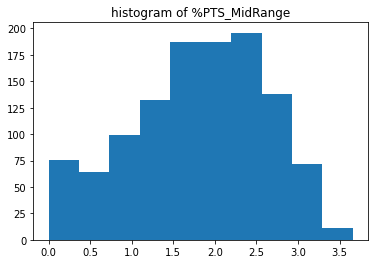

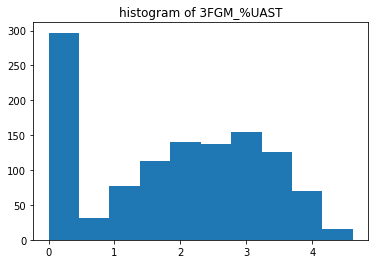

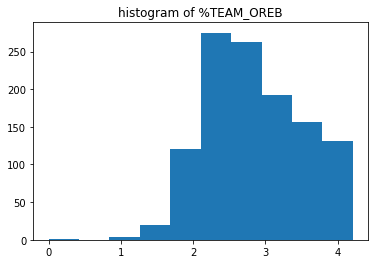

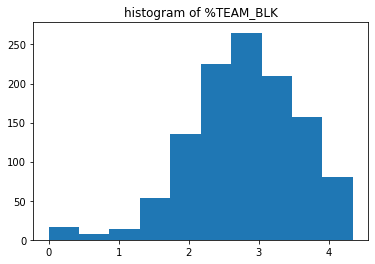

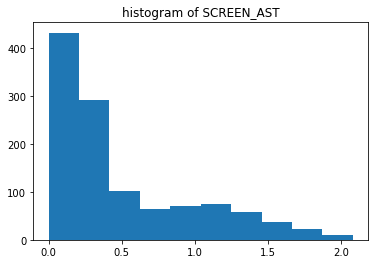

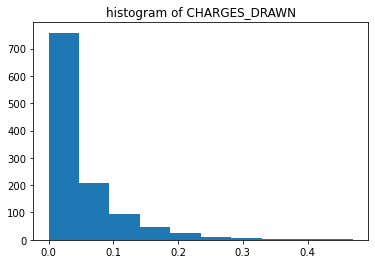

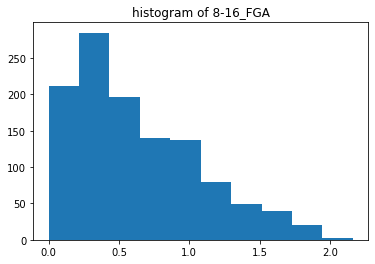

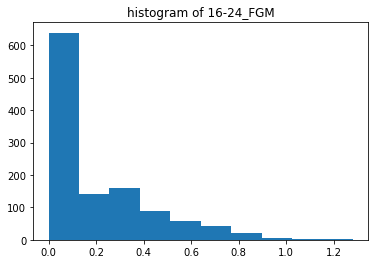

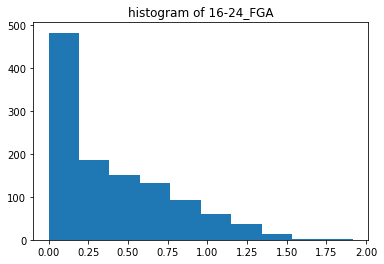

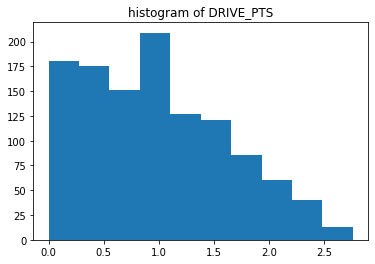

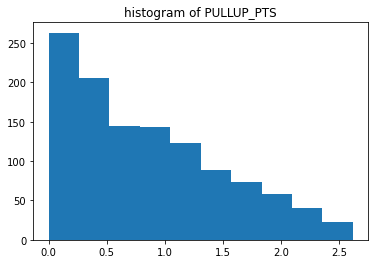

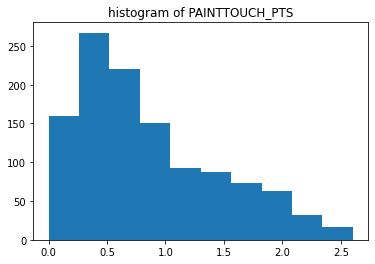

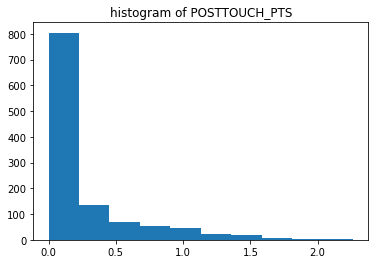

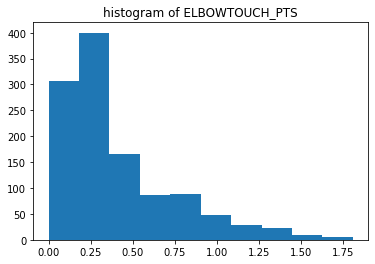

In [14]:
for column in right_skewed:
    hist_create(X,column,lambda x: np.log(x + 1))

In [15]:
# Apply transformation
for column in right_skewed:
    X[column] = np.log(X[column] + 1)

In [16]:
left_skewed = [column for column in not_right_skewed if abs(X[column].mean()) <= abs((.75*X[column].median()))]
len(left_skewed)

0

# Validating Clustering Tendencies of Dataset

Before moving on to the steps of dimensionality reduction and actual modelling, I wanted to perform a few quick checks to ensure that the dataset has clustering tendencies. These checks will be done once optimal number of clusters and other parameters are optimized as well but will also be done now without improving our dataset to get a baseline snapshot of our current dataset. There will be two methods to determine clustering tendencies:

1) The first will be using visual heuristics - I will use PCA and TSNE to reduce the dimensionality of the dataset to 2 components purely for visualization purposes and perform a visual check to see if there are patterns that exhibit clustering tendencies.

2) Afterwards, using the pyclustertend library, I will calculate the hopkins score - a metric that explains spatial randomness of the data. The pyclustertend library documentation as well as other online sources indicate that a score around 0.5 expresses non-clustering tendencies (data is uniformly distributed) and scores that tend to 0 indicate high clustering tendencies. Using the Pyclustertend library as well as other online sources, the threshold set will be 3.0.

### Visualizing in 2D with PCA

In [17]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [18]:
# Scale data
mm_scaler = MinMaxScaler()
s_scaler = StandardScaler()
r_scaler = RobustScaler()

X_mm = mm_scaler.fit_transform(X)
X_ss = s_scaler.fit_transform(X)
X_rs = r_scaler.fit_transform(X)

In [19]:
# PCA
pca = PCA(n_components=2)

# fit_transform pca and print explained variance ratio sum
X_mm_pca = pca.fit_transform(X_mm)
print(f'Explained Variance Ratio for X_mm: {pca.explained_variance_ratio_.sum()}')

X_ss_pca = pca.fit_transform(X_ss)
print(f'Explained Variance Ratio for X_ss: {pca.explained_variance_ratio_.sum()}')

X_rs_pca = pca.fit_transform(X_rs)
print(f'Explained Variance Ratio for X_rs: {pca.explained_variance_ratio_.sum()}')

Explained Variance Ratio for X_mm: 0.5526826666962258
Explained Variance Ratio for X_ss: 0.504230180099448
Explained Variance Ratio for X_rs: 0.463650292623781


Text(0.5, 1.0, 'Robust Scaled')

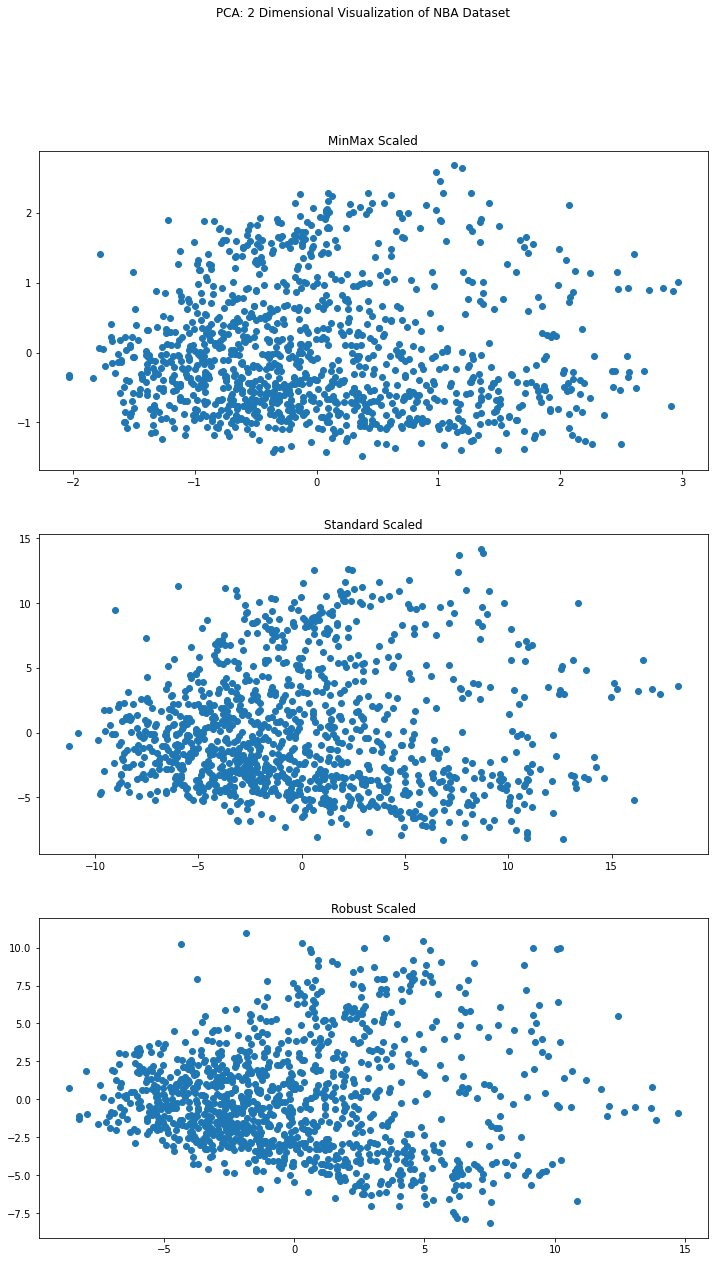

In [20]:
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(12,20))
fig.suptitle('PCA: 2 Dimensional Visualization of NBA Dataset')
ax1.scatter(X_mm_pca[:,0], X_mm_pca[:,1])
ax1.set_title('MinMax Scaled')

ax2.scatter(X_ss_pca[:,0], X_ss_pca[:,1])
ax2.set_title('Standard Scaled')

ax3.scatter(X_rs_pca[:,0], X_rs_pca[:,1])
ax3.set_title('Robust Scaled')

### Visualizing in 2D with TSNE

In [21]:
tsne = TSNE(n_components=2, random_state=14)

X_mm_tsne = tsne.fit_transform(X_mm)
X_ss_tsne = tsne.fit_transform(X_ss)
X_rs_tsne = tsne.fit_transform(X_rs)

Text(0.5, 1.0, 'Robust Scaled')

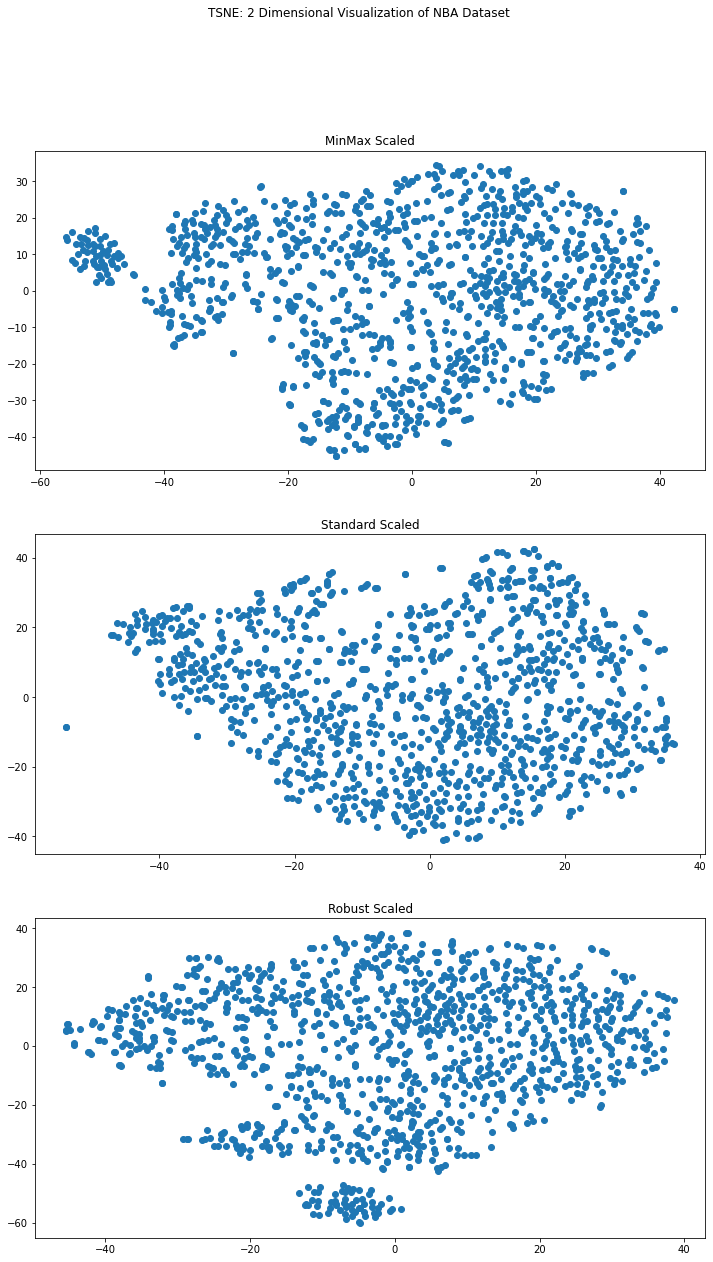

In [22]:
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(12,20))
fig.suptitle('TSNE: 2 Dimensional Visualization of NBA Dataset')
ax1.scatter(X_mm_tsne[:,0], X_mm_tsne[:,1])
ax1.set_title('MinMax Scaled')

ax2.scatter(X_ss_tsne[:,0], X_ss_tsne[:,1])
ax2.set_title('Standard Scaled')

ax3.scatter(X_rs_tsne[:,0], X_rs_tsne[:,1])
ax3.set_title('Robust Scaled')

From the visuals above, the clustering tendencies of the datasets do appear a bit low. However, that being said, for the TSNE visuals, the minmax-scaled data and the robust-scaled data clearly exhibit at least 2-3 distinct clusters and one could make the argument that the standard-scaled data shows 3 distinct clusters.

The next check will be with the hopkins test as mentioned earlier using a threshold of 0.3.

In [23]:
from pyclustertend import hopkins

print(f'Hopkins Test Score For X_mm: {hopkins(X_mm, X_mm.shape[0])}')
print(f'Hopkins Test Score For X_ss: {hopkins(X_ss, X_ss.shape[0])}')
print(f'Hopkins Test Score For X_rs: {hopkins(X_rs, X_rs.shape[0])}')

Hopkins Test Score For X_mm: 0.24197329300340706
Hopkins Test Score For X_ss: 0.23269571952005472
Hopkins Test Score For X_rs: 0.22975880750158656


The hopkins test scores for all three differently-scaled datasets - using the threshold of 0.3 - indicates that the dataset does exhibit clustering tendencies (the test scores are all relatively similar).

# Dimensionality Reduction

Even after I manually removed redundant features earlier (using threshold of 0.98 correlation coefficient), the dataset contains 100 features. As a result, the curse of dimensionality is a big concern that needs to be addressed before clustering. 

Ideally, I would want to apply feature selection first in order to narrow the amount of features to the most important ones. That being said, feature selection for unsupervised learning is very difficult to do and can inject a lot of bias into the dataset. I have split this notebook/project into two different sections:

1) The first section (the one that will be performed now) is a more conservative process. I will undergo the regular clustering processes by scaling the dataset, applying dimensionality reduction only, and then clustering.

2) For the second section (after first section is complete), I will again perform scaling on the dataset, applying feature selection (through PFA), then applying dimensionality reduction, and then clustering.

# PCA
There are two different dimensionality reduction processes that I will perform. The first is PCA and in order to choose the optimal number of PCs, I will use an elbow plot and check the optimal number of PCs for the three, differently-scaled datasets.

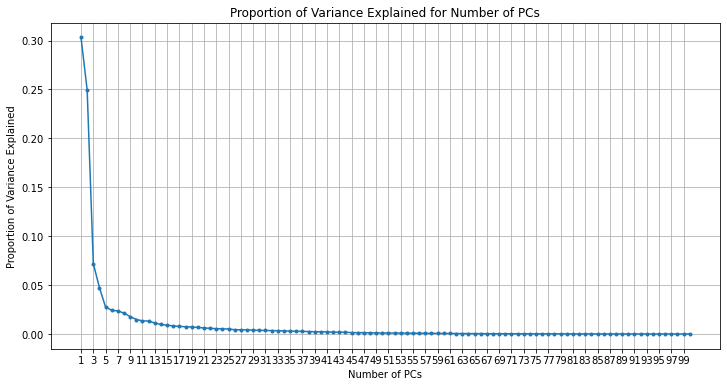

In [24]:
# Minmax scaled data
pca = PCA()

pca_mm = pca.fit(X_mm)

# Instantiate variable for explained variance ratio (minmax scaled dataset)
expl_var_mm = pca_mm.explained_variance_ratio_

# Plot scree (eblow) plot
plt.figure(figsize=(12, 6))
plt.plot(range(1,101),expl_var_mm,marker='.')
plt.title('Proportion of Variance Explained for Number of PCs')
plt.xlabel('Number of PCs')
plt.ylabel('Proportion of Variance Explained')
plt.xticks(range(1,101,2))
plt.grid()
plt.show()

In [25]:
# Check how much variance can be explained with 5 components
np.cumsum(expl_var_mm[:5])

array([0.30317764, 0.55268267, 0.62472959, 0.67204727, 0.69951384])

With the elbow plot, the optimal number of components was shown to be 5 components that explained about 70% of the total variance in the dataset. I also want to quickly evaluate how many additional components needed to increase this explained variance ratio significantly.

Arbitrarily selecting 10% as a measure of significant increase in explained variance, I will plot of cumulative sum graph to see how many additional components would be needed to get an explained variance ratio of 80%.

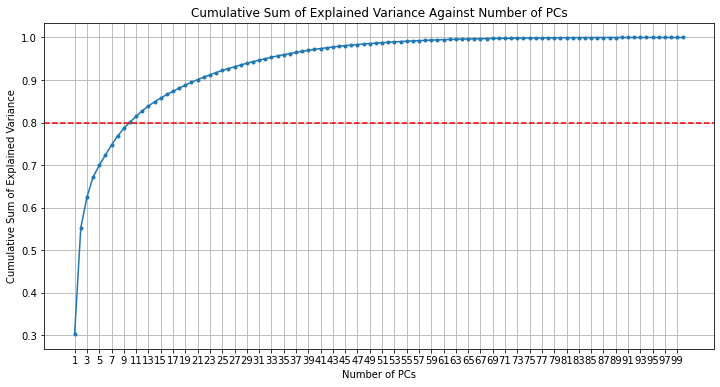

In [26]:
# Plot out the cumulative sum graph
plt.figure(figsize=(12,6))
plt.plot(range(1,101), np.cumsum(expl_var_mm), marker='.')
plt.axhline(0.8, c='r', linestyle='--')
plt.title('Cumulative Sum of Explained Variance Against Number of PCs')
plt.xlabel('Number of PCs')
plt.ylabel('Cumulative Sum of Explained Variance')
plt.xticks(range(1,101,2))
plt.grid()
plt.show()

The graph indicates that 10 more components would be needed (100% increase) in order to increase the explained variance by 10%. I will choose to stick with n_components=5 which provides enough explained variance while maintaining good interpretability. I will continue these steps for the standard-scaled and robust-scaled datasets.

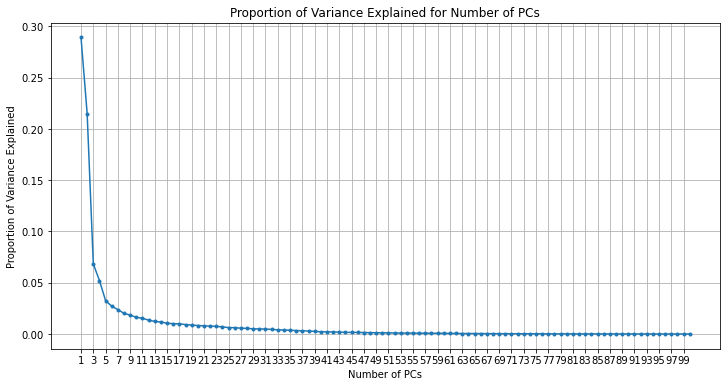

In [27]:
# Standard scaled data
pca = PCA()
pca_ss = pca.fit(X_ss)

expl_var_ss = pca_ss.explained_variance_ratio_

# Plot scree (eblow) plot
plt.figure(figsize=(12, 6))
plt.plot(range(1,101),expl_var_ss,marker='.')
plt.title('Proportion of Variance Explained for Number of PCs')
plt.xlabel('Number of PCs')
plt.ylabel('Proportion of Variance Explained')
plt.xticks(range(1,101,2))
plt.grid()
plt.show()

In [28]:
print(f'Explained Variance for 5 Components: {np.cumsum(expl_var_ss[:5])}')

Explained Variance for 5 Components: [0.28925749 0.50423018 0.57252962 0.62461981 0.65710504]


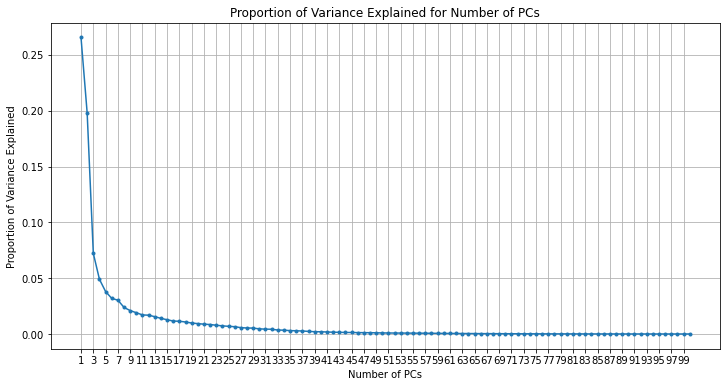

In [29]:
# Robust-scaled data
pca = PCA()
pca_rs = pca.fit(X_rs)

expl_var_rs = pca_rs.explained_variance_ratio_

# Plot scree (eblow) plot
plt.figure(figsize=(12, 6))
plt.plot(range(1,101),expl_var_rs,marker='.')
plt.title('Proportion of Variance Explained for Number of PCs')
plt.xlabel('Number of PCs')
plt.ylabel('Proportion of Variance Explained')
plt.xticks(range(1,101,2))
plt.grid()
plt.show()

In [30]:
print(f'Explained Variance for 8 Components: {np.cumsum(expl_var_rs[:8])}')

Explained Variance for 8 Components: [0.26561187 0.46365029 0.53584729 0.58478708 0.62278908 0.65466574
 0.68493565 0.70870602]


For the standard scaled dataset, I select 5 components (explained variance of 0.65) and for the robust scaled dataset, I selected 8 components (explained variance of 0.7).

Summary:
- minmax data: 5 components
- standard data: 5 components
- robust data: 8 components

In [31]:
# Transform all datasets
X_mm_pca = pca_mm.transform(X_mm)
X_ss_pca = pca_ss.transform(X_ss)
X_rs_pca = pca_rs.transform(X_rs)

The next step will be to perform the actual clustering with these finalized datasets. I will evaluate the clustering performance using inertia and silhouette scores. These are the two most common metrics implemented in the sci-kit library used for unsupervised learning when ground truth labels are unknown. For KMeans hyperparameters, I am semi-arbitrarily selecting init='k-means++' to ensure centers are are initialized with some distance apart, and increasing n_init and max_iter to find a more stable solution (balancing with computational costs)

### MinMax Data

C:\Users\imdan\anaconda3\envs\ecosystem\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


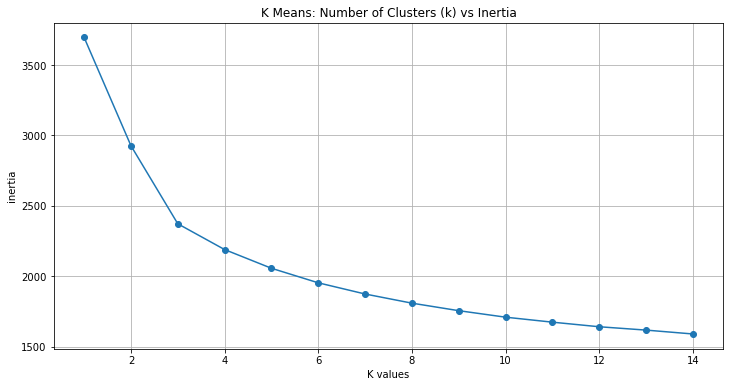

In [32]:
from sklearn.cluster import KMeans

# Get inertia values as a function of different cluster sizes
ks = np.arange(1,15)

inertias = []

for k in ks:
    
    kmeans = KMeans(n_clusters=k, random_state=12, init='k-means++', n_init=50, max_iter=500)
    kmeans.fit(X_mm_pca)
    
    inertias.append(kmeans.inertia_)
    
# Plot inertias against k values (number of clusters)    
plt.figure(figsize=(12, 6))
plt.plot(ks, inertias, marker='o')
plt.grid()
plt.xlabel('K values')
plt.ylabel('inertia')
plt.title('K Means: Number of Clusters (k) vs Inertia')
plt.show()

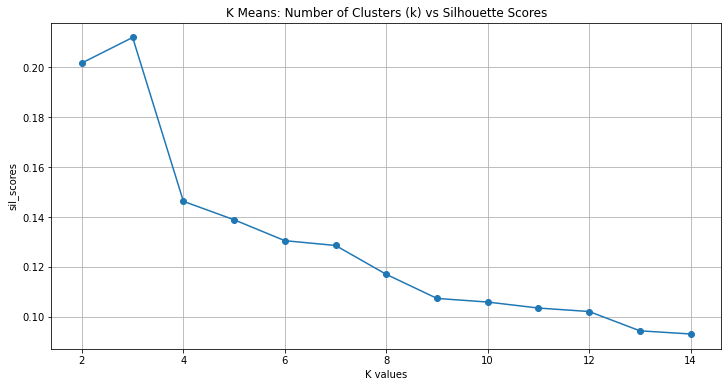

In [33]:
from sklearn.metrics import silhouette_score
ks = np.arange(2,15)

sil_scores = []

for k in ks:
    
    kmeans = KMeans(n_clusters=k, random_state=12, init='k-means++', n_init=50, max_iter=500)
    kmeans.fit(X_mm_pca)
    
    sil_scores.append(silhouette_score(X_mm_pca, kmeans.labels_))

# Plot sil_scores against number of clusters
plt.figure(figsize=(12, 6))
plt.plot(ks, sil_scores, marker='o')
plt.grid()
plt.xlabel('K values')
plt.ylabel('sil_scores')
plt.title('K Means: Number of Clusters (k) vs Silhouette Scores')
plt.savefig(fname='C:/Users/imdan/downloads/data/minmax_silscore.jpeg')

For the minmax dataset, both metrics indicate that the optimal number of clusters is 3 the a silhouette score of about 0.21. I will perform the same steps for the other datasets before moving on.

### Standard Data

C:\Users\imdan\anaconda3\envs\ecosystem\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


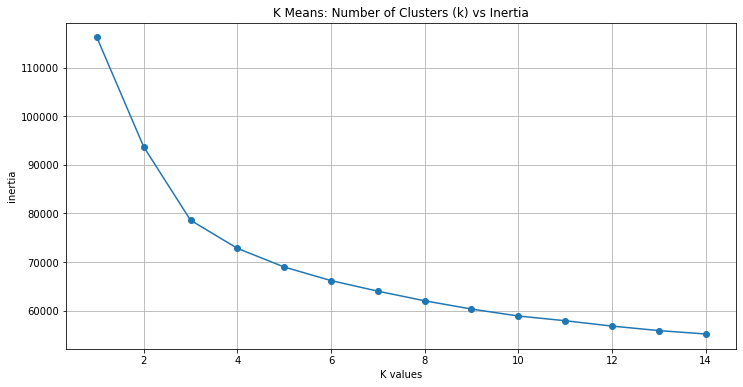

In [34]:
# Get inertia values as a function of different cluster sizes
ks = np.arange(1,15)

inertias = []

for k in ks:
    
    kmeans = KMeans(n_clusters=k, random_state=12, init='k-means++', n_init=50, max_iter=500)
    kmeans.fit(X_ss_pca)
    
    inertias.append(kmeans.inertia_)
    
# Plot inertias against k values (number of clusters)    
plt.figure(figsize=(12, 6))
plt.plot(ks, inertias, marker='o')
plt.grid()
plt.xlabel('K values')
plt.ylabel('inertia')
plt.title('K Means: Number of Clusters (k) vs Inertia')
plt.show()

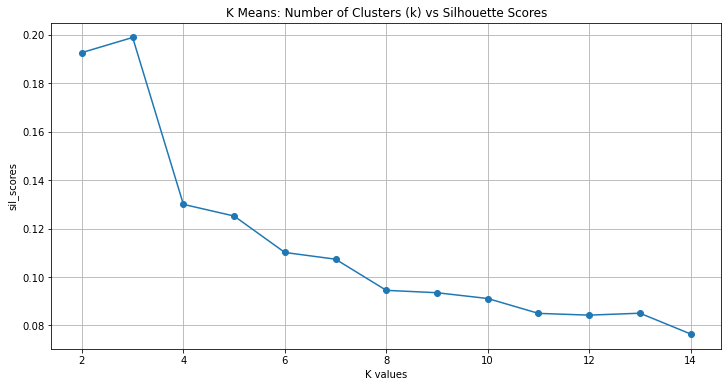

In [35]:
ks = np.arange(2,15)

sil_scores = []

for k in ks:
    
    kmeans = KMeans(n_clusters=k, random_state=12, init='k-means++', n_init=50, max_iter=500)
    kmeans.fit(X_ss_pca)
    
    sil_scores.append(silhouette_score(X_ss_pca, kmeans.labels_))

# Plot sil_scores against number of clusters
plt.figure(figsize=(12, 6))
plt.plot(ks, sil_scores, marker='o')
plt.grid()
plt.xlabel('K values')
plt.ylabel('sil_scores')
plt.title('K Means: Number of Clusters (k) vs Silhouette Scores')
plt.show()

### Robust Dataset

C:\Users\imdan\anaconda3\envs\ecosystem\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


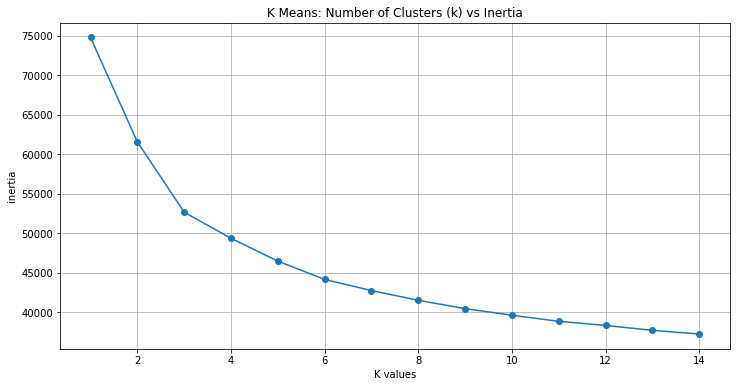

In [36]:
ks = np.arange(1,15)

inertias = []

for k in ks:
    
    kmeans = KMeans(n_clusters=k, random_state=12, init='k-means++', n_init=50, max_iter=500)
    kmeans.fit(X_rs_pca)
    
    inertias.append(kmeans.inertia_)
    
# Plot inertias against k values (number of clusters)    
plt.figure(figsize=(12, 6))
plt.plot(ks, inertias, marker='o')
plt.grid()
plt.xlabel('K values')
plt.ylabel('inertia')
plt.title('K Means: Number of Clusters (k) vs Inertia')
plt.show()

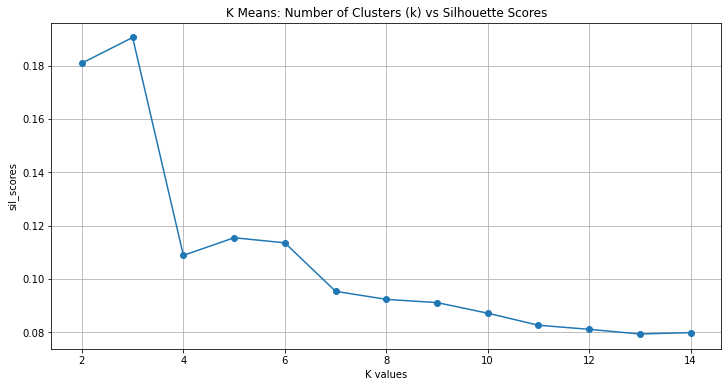

In [37]:
ks = np.arange(2,15)

sil_scores = []

for k in ks:
    
    kmeans = KMeans(n_clusters=k, random_state=12, init='k-means++', n_init=50, max_iter=500)
    kmeans.fit(X_rs_pca)
    
    sil_scores.append(silhouette_score(X_rs_pca, kmeans.labels_))

# Plot sil_scores against number of clusters
plt.figure(figsize=(12, 6))
plt.plot(ks, sil_scores, marker='o')
plt.grid()
plt.xlabel('K values')
plt.ylabel('sil_scores')
plt.title('K Means: Number of Clusters (k) vs Silhouette Scores')
plt.show()

From the visuals above, the optimal number of clusters for all datasets was 3. However, the minmax dataset provided the highest silhouette score with 0.21. This silhouette score is quite low and indicates that I should try to increase this score before moving forward. There are two steps to increase the silhouette score for the KMeans model:

1) I can play around with the number of components for PCA-transformed data and add additional components to achieve a higher explained variance ratio.

2) I can try a different type of dimensionality reduction.

I will proceed with the latter option (reasoning is the same as to why I didn't increase the explained variance ratio earlier). For now, I will implement dimensionality reduction using Linear Discriminant Analysis. This makes sense because LDA uses class labels to find a subspace that maximizes class seperability. I will apply LDA with the classes before the NBA players' traditional positions. For LDA, scaling has no effect, so I will only apply LDA on the minmax data.

In [38]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Instatiate target (clases) as the traditional positions
y = df['POSITION']

lda = LDA()
lda_mm = lda.fit(X_mm, y)


# Instantiate variable for explained variance ratio (minmax scaled dataset)
expl_var_mm = lda_mm.explained_variance_ratio_

print(expl_var_mm)

[0.80399647 0.14988988 0.02986437 0.01624929]


LDA captured about 95% of the total variance in just two components. 

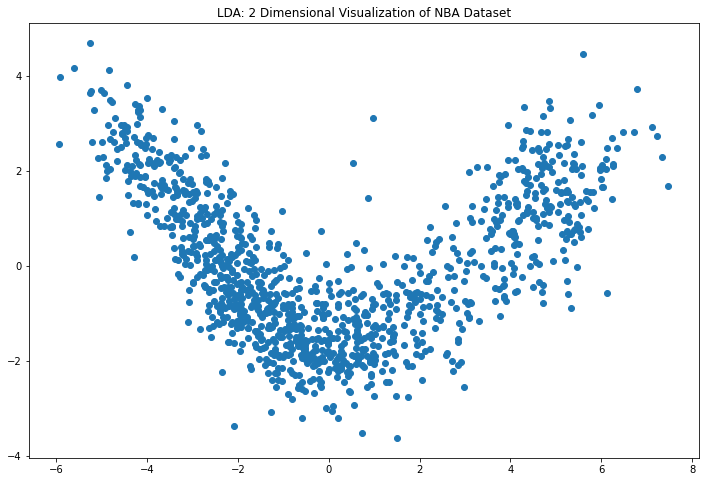

In [39]:
# Use 2 components
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X_mm, y)

plt.figure(figsize=(12,8))
plt.scatter(X_lda[:,0], X_lda[:,1])
plt.title('LDA: 2 Dimensional Visualization of NBA Dataset')
plt.show()

C:\Users\imdan\anaconda3\envs\ecosystem\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


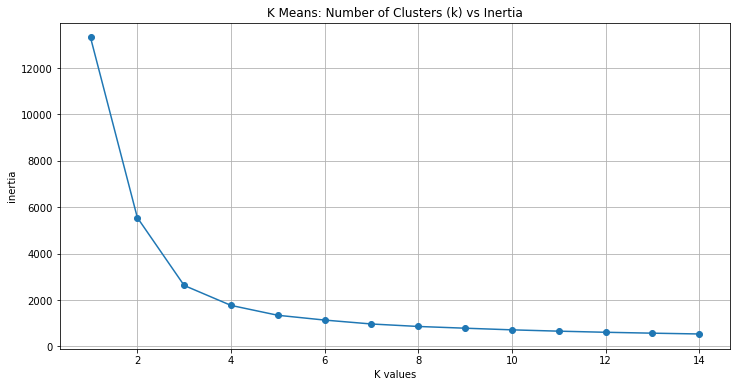

In [40]:
ks = np.arange(1,15)

inertias = []

for k in ks:
    
    kmeans = KMeans(n_clusters=k, random_state=12, init='k-means++', n_init=50, max_iter=500)
    kmeans.fit(X_lda)
    
    inertias.append(kmeans.inertia_)
    
# Plot inertias against k values (number of clusters)    
plt.figure(figsize=(12, 6))
plt.plot(ks, inertias, marker='o')
plt.grid()
plt.xlabel('K values')
plt.ylabel('inertia')
plt.title('K Means: Number of Clusters (k) vs Inertia')
plt.show()

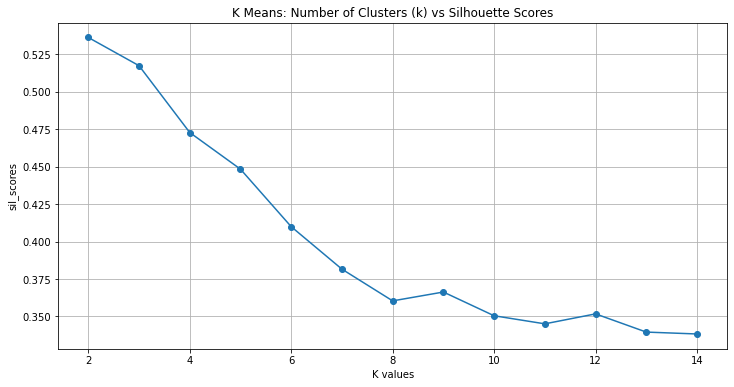

In [41]:
ks = np.arange(2,15)

sil_scores = []

for k in ks:
    
    kmeans = KMeans(n_clusters=k, random_state=10, init='k-means++', n_init=50, max_iter=500)
    kmeans.fit(X_lda)
    
    sil_scores.append(silhouette_score(X_lda, kmeans.labels_))

# Plot sil_scores against number of clusters
plt.figure(figsize=(12, 6))
plt.plot(ks, sil_scores, marker='o')
plt.grid()
plt.xlabel('K values')
plt.ylabel('sil_scores')
plt.title('K Means: Number of Clusters (k) vs Silhouette Scores')
plt.savefig(fname='C:/Users/imdan/downloads/data/lda_silscore.jpeg')

The silhouette score here is significantly better than our PCA-transformed dataset. Additionally, the visualization definitely showcases higher clustering tendencies than with our PCA/TSNE visualizations. However, there is a big issue here indicated that LDA is able to capture 95% of the total variance with just the first 2 components. LDA is well-known to be prone to overfitting and that is what may be happening here. To address this issue, I will first play around with reducing the number of features before even applying LDA dimensionality reduction.

# Additional Feature Selection & Dimensionality Reduction

I will be performing additional filter methods for feature selection to reduce the number of features:

1) Variance threshold to eliminate constant columns (might be 0 but will check)

2) Using Pearson's Correlation Coefficient and eliminating features that share a coefficient value of over 92% and I will be manually dropping these to keep the more interpretable features.

In [42]:
# Normalize before applying variance threshold

X_mm = mm_scaler.fit_transform(X)

X_mm = pd.DataFrame(data=X_mm, columns=X.columns)

In [43]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold()
practice = selector.fit_transform(X_mm)

In [44]:
practice.shape

(1162, 100)

No columns were dropped by eliminating constant features - moving on to filtering out using correlation coefficient.

In [45]:
corr = X.corr()

corr.shape

corr.abs().unstack().sort_values(ascending=False).drop_duplicates().head(50)

PTS                    PTS                      1.000000
%TEAM_OREB             OREB%                    0.981554
FGA                    PTS                      0.979910
%TEAM_3PA              %TEAM_3PM                0.977284
%FGA_3PT               %PTS_3PT                 0.976695
<8FT_FGA               PAINT_PTS                0.975395
%TEAM_FTA              %TEAM_FTM                0.974227
USG%                   %TEAM_FGA                0.972578
REB                    DREB                     0.972073
PF_DRAWN               FTA                      0.971833
16-24_FGA              16-24_FGM                0.969670
%TEAM_FGM              %TEAM_PTS                0.968141
%PTS_2PT               %PTS_3PT                 0.964293
                       %FGA_3PT                 0.962684
REB%                   DREB%                    0.957119
%TEAM_PFDRAWN          %TEAM_FTA                0.956414
CONTEST_SHOTS          CONTEST_2PT              0.954665
eFG%                   TS%     

In [46]:
X = X.drop(['%TEAM_OREB', 'FGA', '%TEAM_3PA', '%FGA_3PT', '<8FT_FGA', '%TEAM_FTA', '%TEAM_FGA', 'DREB', 'FTA', 
            '16-24_FGA', '%TEAM_FGM', '%FGA_3PT', '%PTS_3PT', 'DREB%', '%TEAM_FTA', 'eFG%', 'CONTEST_SHOTS', 
            'OPP_PAINT_PTS', '%PTS_2PT', 'DEFLECTIONS', '%TEAM_FTM', '>=24FT_FG%'], axis=1)

In [47]:
# Check how many features remaining
X.shape

(1162, 80)

We have 80 features after removing the heavily correlated features. This is still a large number of features but I will apply dimensionality reduction moving forward. From previously, it's clear that applying LDA (with the traditional 5 positions being the labels) provided a much higher silhouette score. However, the problem was that there seemed to be overfitting because the first 2 components accounts for about 95% of the variation. 

I will be moving forward with the LDA dataset; however, I need to ensure that the explained variance isn't so high because it may adversely affect clustering algorithms. Additionally, from this step forward, I will only be using minmax-scaled data as minmax-scaler seems to be the most common scaler for clustering and minmax makes a lot of sense when comparing statistics for NBA players.

In [48]:
# Scale
mm_scaler = MinMaxScaler()
X_mm = mm_scaler.fit_transform(X) 

In [49]:
# Try the same method as previously with new dataset containing 80 features instead of 100
lda = LDA()
X_lda = lda.fit(X_mm, y)

expl_var_lda = X_lda.explained_variance_ratio_

print(expl_var_lda)

[0.80651713 0.15215299 0.02774065 0.01358923]


It's clear that even with the new dataset, there appears to be overfitting with an explained variance ratio of over 0.95 with just the first two components. In order to ensure that overfitting isn't a problem moving forward, I will be using LDA with the 'eigen' solver that allows a shrinkage parameter. The optimal shrinkage parameter will be determined somewhat arbitrarily; I will select the parameter that provides around 0.8-0.85 explained variance in the first 2 components.

In [50]:
shrink_vals = [0.009, 0.008, 0.007, 0.006, 0.005, 0.004, 0.003, 0.002, 0.001]

for val in shrink_vals:
    lda = LDA(solver='eigen', shrinkage=val, n_components=2)
    X_lda = lda.fit(X_mm, y)
    
    explained_var = X_lda.explained_variance_ratio_
    
    if (explained_var[0] + explained_var[1]) >= 0.7:
        print(f'Shrinkage: {val}', f'Component 1: {explained_var[0]}', f'Component 2: {explained_var[1]}')

Shrinkage: 0.009 Component 1: 0.6149971938870797 Component 2: 0.11280374363533442
Shrinkage: 0.008 Component 1: 0.6249177036842235 Component 2: 0.11488279364856706
Shrinkage: 0.007 Component 1: 0.635820639169664 Component 2: 0.11716838006461766
Shrinkage: 0.006 Component 1: 0.647920513162905 Component 2: 0.11970565524050542
Shrinkage: 0.005 Component 1: 0.6615132539389588 Component 2: 0.122556978972835
Shrinkage: 0.004 Component 1: 0.6770261800336201 Component 2: 0.12581250495752855
Shrinkage: 0.003 Component 1: 0.6951171308463334 Component 2: 0.12961114318680278
Shrinkage: 0.002 Component 1: 0.7169035950143247 Component 2: 0.13418872964748327
Shrinkage: 0.001 Component 1: 0.7446613388409614 Component 2: 0.14002218393624657


I will be selecting the shrinkage value to be 0.002 which provides about 84% explained variance in the first 2 components.

In [51]:
# Apply dimensionality reduction to dataset
lda = LDA(solver='eigen', shrinkage=0.002, n_components=2)

X_lda = lda.fit_transform(X_mm, y)

print(X_lda.shape)
print(lda.explained_variance_ratio_)

(1162, 2)
[0.7169036  0.13418873]


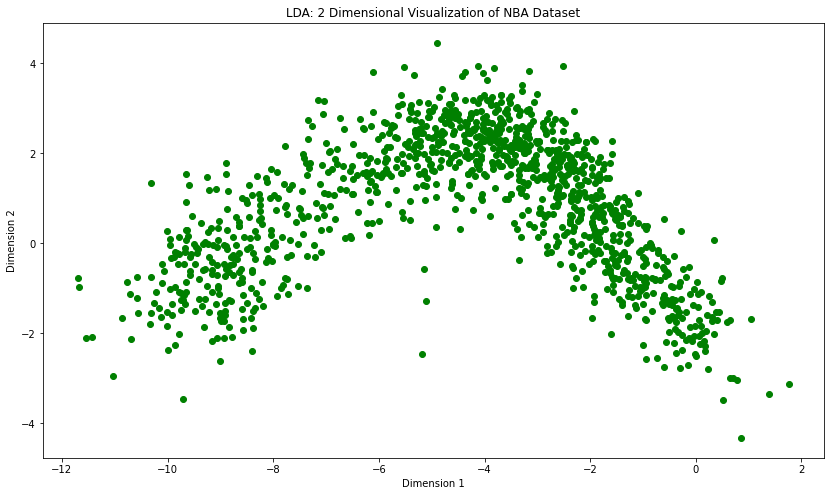

In [62]:
# Plot
plt.figure(figsize=(14,8))
plt.scatter(X_lda[:,0], X_lda[:,1], c='green')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('LDA: 2 Dimensional Visualization of NBA Dataset')
plt.savefig(fname='C:/Users/imdan/downloads/data/lda_featurespace.jpeg')

# Clustering Models

I will start to perform some clustering and analysis of the clusters. The optimal number of clusters will be selected by examining inertia, silhouette scores, and davies-bouldin scores.

### KMeans

C:\Users\imdan\anaconda3\envs\ecosystem\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


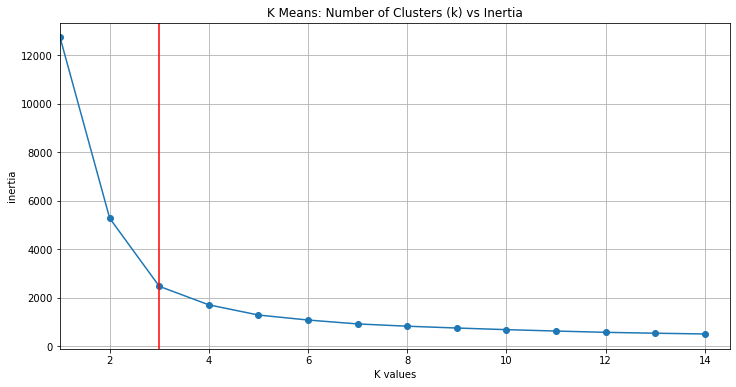

In [63]:
# Plot Inertias
ks = np.arange(1,15)

inertias = []

for k in ks:
    
    kmeans = KMeans(n_clusters=k, random_state=12, init='k-means++', n_init=50, max_iter=500)
    kmeans.fit(X_lda)
    
    inertias.append(kmeans.inertia_)
    
# Plot inertias against k values (number of clusters)    
plt.figure(figsize=(12, 6))
plt.plot(ks, inertias, marker='o')
plt.grid()
plt.xlabel('K values')
plt.xlim(1, 14.5)
plt.axvline(x=3, c='red')
plt.ylabel('inertia')
plt.title('K Means: Number of Clusters (k) vs Inertia')
plt.savefig(fname='C:/Users/imdan/downloads/data/kmeans_intertia.jpeg')

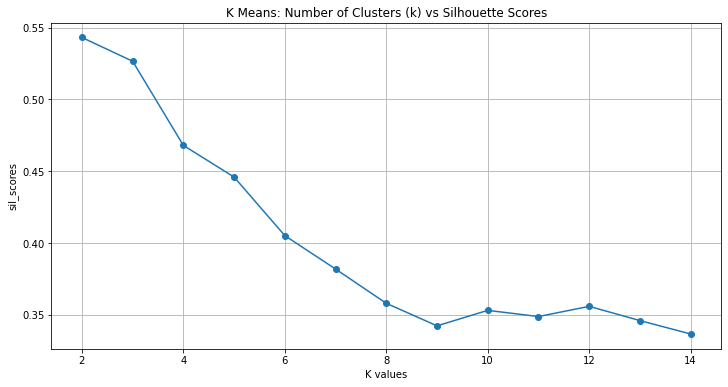

In [64]:
# Plot Silhouette Scores
ks = np.arange(2,15)

sil_scores = []

for k in ks:
    
    kmeans = KMeans(n_clusters=k, random_state=12, init='k-means++', n_init=50, max_iter=500)
    kmeans.fit(X_lda)
    
    sil_scores.append(silhouette_score(X_lda, kmeans.labels_))

# Plot sil_scores against number of clusters
plt.figure(figsize=(12, 6))
plt.plot(ks, sil_scores, marker='o')
plt.grid()
plt.xlabel('K values')
plt.ylabel('sil_scores')
plt.title('K Means: Number of Clusters (k) vs Silhouette Scores')
plt.show()

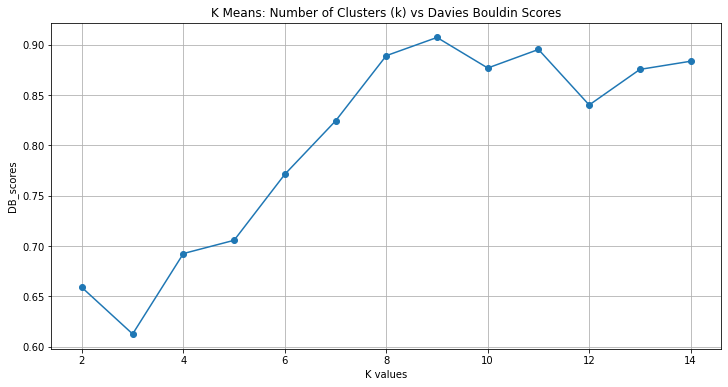

In [65]:
from sklearn.metrics import davies_bouldin_score

ks = np.arange(2,15)

db_scores = []

for k in ks:
    
    kmeans = KMeans(n_clusters=k, random_state=12, init='k-means++', n_init=50, max_iter=500)
    kmeans.fit(X_lda)
    
    db_scores.append(davies_bouldin_score(X_lda, kmeans.labels_))

# Plot sil_scores against number of clusters
plt.figure(figsize=(12, 6))
plt.plot(ks, db_scores, marker='o')
plt.grid()
plt.xlabel('K values')
plt.ylabel('DB_scores')
plt.title('K Means: Number of Clusters (k) vs Davies Bouldin Scores')
plt.show()

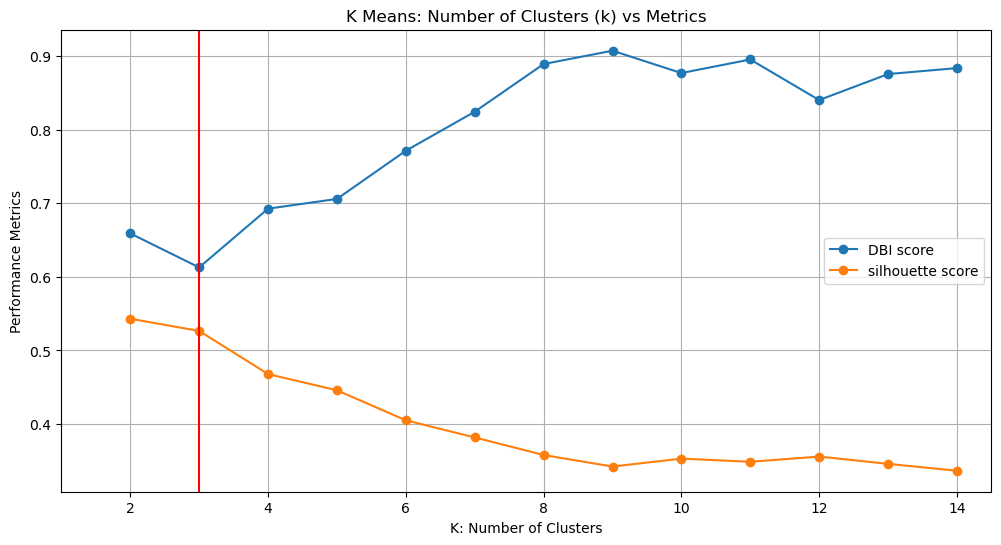

In [66]:
ks = np.arange(2,15)
plt.style.use('default')
plt.figure(figsize=(12,6))
plt.plot(ks, db_scores, marker='o', label='DBI score')
plt.plot(ks, sil_scores, marker='o', label='silhouette score')
plt.grid()
plt.xlabel('K: Number of Clusters')
plt.ylabel('Performance Metrics')
plt.xlim(1, 14.5)
plt.title('K Means: Number of Clusters (k) vs Metrics')
plt.axvline(x=3, c='red')
plt.legend()
plt.savefig(fname='C:/Users/imdan/downloads/data/kmeans_metrics1.jpeg')

Using all the metrics above, I will be selecting 3 clusters as the optimal number of clusters to examine initially.

In [67]:
# Get cluster labels
kmeans = KMeans(n_clusters=3, random_state=12, init='k-means++', n_init=50, max_iter=500)
kmeans.fit(X_lda)
kmeans_labels = kmeans.labels_

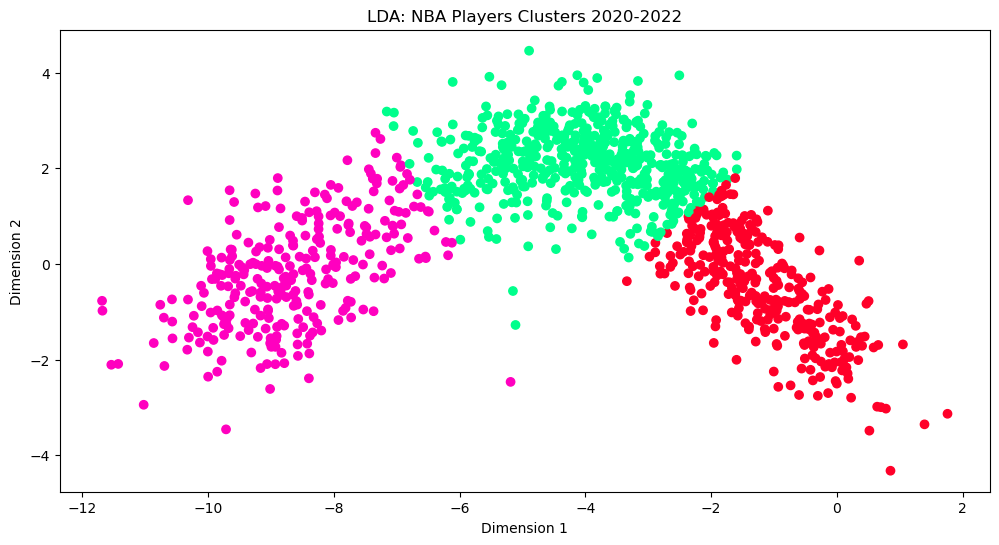

In [71]:
# Plot
plt.figure(figsize=(12,6))
plt.style.use('default')
plt.scatter(X_lda[:,0], X_lda[:,1], c=kmeans_labels, cmap='gist_rainbow')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('LDA: NBA Players Clusters 2020-2022')
plt.savefig(fname='C:/Users/imdan/downloads/data/3clusters1.jpeg')

This definitely does look like the most naturally separated areas visually. I will analyze the information further by checking the variance within the statistics for each feature.

In [72]:
X_mm = mm_scaler.fit_transform(X)
X_mm = pd.DataFrame(data=X_mm, columns = X.columns)

In [73]:
kmeans3_df = X_mm.copy()

# Create labels column
kmeans3_df['kmeans_labels'] = kmeans_labels

# Check clusters' statistical means
grouped_kmeans3 = kmeans3_df.groupby('kmeans_labels', as_index=False).mean().T

In [74]:
grouped_kmeans3

,0,1,2
kmeans_labels,0.000000,1.000000,2.000000
PTS,0.333008,0.272531,0.276153
FG%,0.292028,0.320717,0.534943
3PA,0.329570,0.287159,0.124409
3P%,0.350049,0.347446,0.257116
...,...,...,...
PAINTTOUCH_FG%,0.577025,0.620462,0.647814
POSTTOUCH_PTS,0.020401,0.079513,0.248430
POSTTOUCH_FG%,0.161591,0.304810,0.489074
ELBOWTOUCH_PTS,0.095001,0.173236,0.434858


In [75]:
grouped_kmeans3.columns = ['Cluster 0', 'Cluster 1', 'Cluster 2']

In [76]:
grouped_kmeans3['variance'] = grouped_kmeans3.var(axis=1)

grouped_kmeans3.sort_values(by='variance', ascending=False).head(20)

,Cluster 0,Cluster 1,Cluster 2,variance
kmeans_labels,0.000000,1.000000,2.000000,1.000000
SCREEN_AST,0.096936,0.154948,0.579313,0.069357
3FGM_%UAST,0.654202,0.393448,0.146249,0.064519
PAINTTOUCH_PTS,0.139624,0.276309,0.628329,0.063572
REB%,0.158316,0.249793,0.569573,0.046627
WEIGHT,0.230842,0.412842,0.654692,0.045211
HEIGHT,0.315385,0.523148,0.733918,0.043793
PULLUP_PTS,0.514206,0.311975,0.118101,0.039231
OREB%,0.349052,0.454061,0.730492,0.038823
2FGM_%UAST,0.626781,0.345474,0.253455,0.037829


In [77]:
# Finding features with highest variance between clusters
grouped_kmeans3_sorted = grouped_kmeans3.sort_values(by='variance', ascending=False).head(20)

# creating separate table
grouped_kmeans3_sorted = grouped_kmeans3_sorted.drop('kmeans_labels', axis=0)

# Check
grouped_kmeans3_sorted

,Cluster 0,Cluster 1,Cluster 2,variance
SCREEN_AST,0.096936,0.154948,0.579313,0.069357
3FGM_%UAST,0.654202,0.393448,0.146249,0.064519
PAINTTOUCH_PTS,0.139624,0.276309,0.628329,0.063572
REB%,0.158316,0.249793,0.569573,0.046627
WEIGHT,0.230842,0.412842,0.654692,0.045211
HEIGHT,0.315385,0.523148,0.733918,0.043793
PULLUP_PTS,0.514206,0.311975,0.118101,0.039231
OREB%,0.349052,0.454061,0.730492,0.038823
2FGM_%UAST,0.626781,0.345474,0.253455,0.037829
OREB,0.226215,0.306432,0.581532,0.034728


In order to get a better sense of the variability of features between the clusters, a graph will be created to show the features with highest variance between clusters. However, it is important to keep in mind that this isn't a way of measuring 'feature importance' - in other words, which features were the most important to determining clusters that players belonged to. Feature importance will be explored later on.

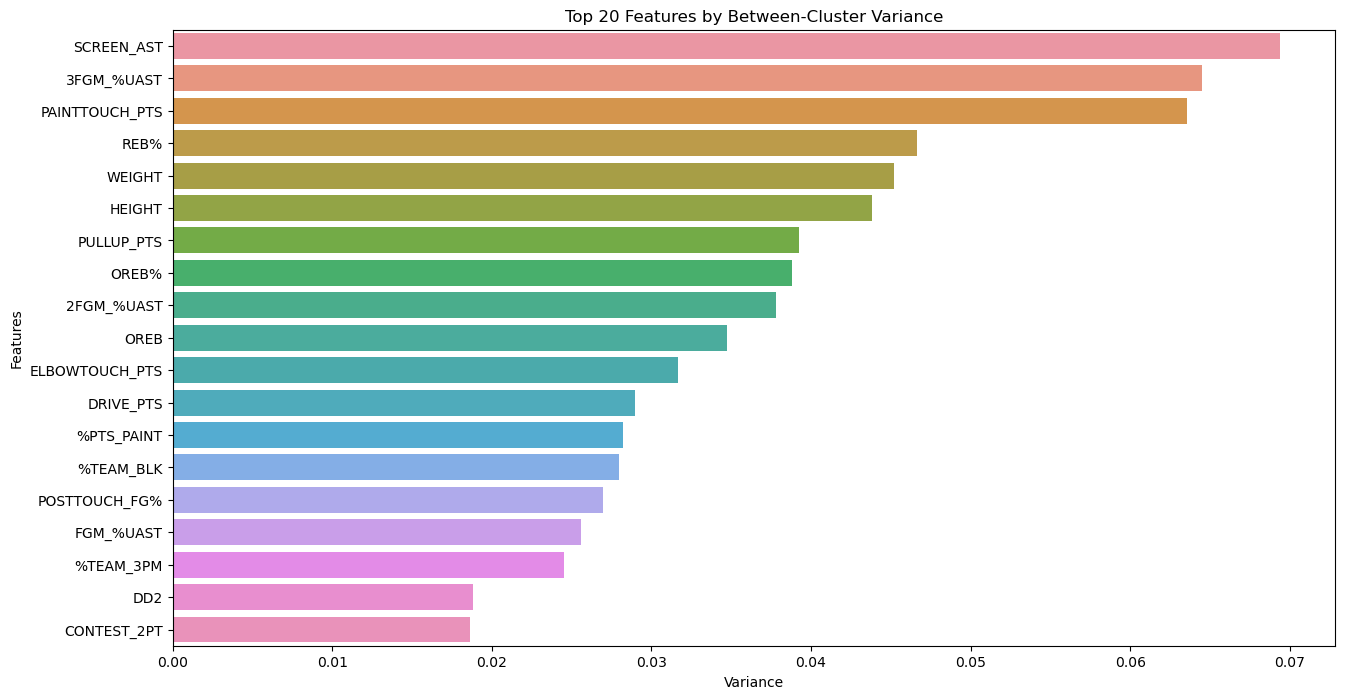

In [78]:
plt.figure(figsize=(15,8))
sns.barplot(x=grouped_kmeans3_sorted['variance'], y=grouped_kmeans3_sorted.index)
plt.title('Top 20 Features by Between-Cluster Variance')
plt.xlabel('Variance')
plt.ylabel('Features')
plt.savefig(fname='C:/Users/imdan/downloads/data/report_01.jpeg')

In [79]:
df_kmeans3 = df.copy()
df_kmeans3['kmeans_label'] = kmeans_labels

In [80]:
df_kmeans3.loc[df_kmeans3['kmeans_label'] == 0].head(20)

,PLAYER,TEAM,AGE,GP,PTS,FGM,FGA,FG%,3PM,3PA,...,CATCHSHOOT_FG%,PULLUP_PTS,PULLUP_FG%,PAINTTOUCH_PTS,PAINTTOUCH_FG%,POSTTOUCH_PTS,POSTTOUCH_FG%,ELBOWTOUCH_PTS,ELBOWTOUCH_FG%,kmeans_label
LeBronJames|2020,LeBronJames,LAL,35,67,25.3,9.6,19.4,49.3,2.2,6.3,...,38.0,5.9,33.0,2.3,68.3,1.8,55.7,1.0,61.4,0
LukaDoncic|2022,LukaDoncic,DAL,23,65,28.4,9.9,21.6,45.7,3.1,8.8,...,31.0,12.4,37.5,0.9,69.2,1.8,44.9,0.3,58.3,0
LukaDoncic|2021,LukaDoncic,DAL,22,66,27.7,9.8,20.5,47.9,2.9,8.3,...,33.3,12.1,42.2,0.9,60.5,1.0,57.5,0.1,33.3,0
LukaDoncic|2020,LukaDoncic,DAL,21,61,28.8,9.5,20.6,46.3,2.8,8.9,...,28.2,8.6,33.5,1.6,66.7,0.8,48.4,0.3,70.0,0
TraeYoung|2022,TraeYoung,ATL,23,76,28.4,9.4,20.3,46.0,3.1,8.0,...,46.2,12.7,42.7,0.5,75.0,0.0,0.0,0.1,33.3,0
TraeYoung|2021,TraeYoung,ATL,22,63,25.3,7.7,17.7,43.8,2.2,6.3,...,34.8,9.1,39.0,0.4,73.3,0.0,0.0,0.2,66.7,0
TraeYoung|2020,TraeYoung,ATL,21,60,29.6,9.1,20.8,43.7,3.4,9.5,...,47.3,11.3,38.4,0.4,76.9,0.0,0.0,0.2,71.4,0
DeMarDeRozan|2021,DeMarDeRozan,SAS,31,61,21.6,7.5,15.1,49.5,0.3,1.2,...,33.6,6.3,48.8,0.8,62.5,0.9,56.7,0.5,53.8,0
JaMorant|2022,JaMorant,MEM,22,57,27.4,10.2,20.6,49.3,1.5,4.5,...,36.8,5.6,37.5,1.8,70.3,0.0,0.0,0.5,70.6,0
JaMorant|2021,JaMorant,MEM,21,63,19.1,6.8,15.2,44.9,1.2,3.8,...,30.6,3.4,34.2,1.7,73.5,0.1,60.0,0.3,42.1,0


In [81]:
df_kmeans3.loc[df_kmeans3['kmeans_label'] == 1].head(20)

,PLAYER,TEAM,AGE,GP,PTS,FGM,FGA,FG%,3PM,3PA,...,CATCHSHOOT_FG%,PULLUP_PTS,PULLUP_FG%,PAINTTOUCH_PTS,PAINTTOUCH_FG%,POSTTOUCH_PTS,POSTTOUCH_FG%,ELBOWTOUCH_PTS,ELBOWTOUCH_FG%,kmeans_label
LeBronJames|2022,LeBronJames,LAL,37,56,30.3,11.4,21.8,52.4,2.9,8.0,...,37.7,6.6,37.4,4.4,74.7,2.3,56.7,2.5,82.2,1
LeBronJames|2021,LeBronJames,LAL,36,45,25.0,9.4,18.3,51.3,2.3,6.3,...,35.8,6.9,38.2,2.3,73.8,1.7,45.2,1.3,66.7,1
GiannisAntetokounmpo|2020,GiannisAntetokounmpo,MIL,25,63,29.5,10.9,19.7,55.3,1.4,4.7,...,36.8,4.8,33.3,6.2,68.7,2.6,58.0,3.4,57.3,1
KevinDurant|2022,KevinDurant,BKN,33,55,29.9,10.5,20.3,51.8,2.1,5.5,...,49.6,12.3,48.8,2.0,66.2,2.1,59.2,2.6,62.4,1
KevinDurant|2021,KevinDurant,BKN,32,35,26.9,9.3,17.2,53.7,2.4,5.4,...,49.1,8.9,48.4,0.9,93.3,2.3,54.4,0.8,65.0,1
DeMarDeRozan|2022,DeMarDeRozan,CHI,32,76,27.9,10.2,20.2,50.4,0.7,1.9,...,38.9,11.9,49.1,1.0,64.6,1.3,49.2,1.0,46.6,1
DeMarDeRozan|2020,DeMarDeRozan,SAS,30,68,22.1,8.2,15.4,53.1,0.1,0.5,...,45.1,5.7,44.4,0.8,63.6,0.8,45.7,0.5,53.8,1
JaysonTatum|2022,JaysonTatum,BOS,24,76,26.9,9.3,20.6,45.3,3.0,8.6,...,38.4,7.4,35.1,2.2,60.9,1.0,48.4,1.3,55.4,1
JaysonTatum|2021,JaysonTatum,BOS,23,64,26.4,9.5,20.6,45.9,2.9,7.6,...,44.6,8.8,35.8,2.3,61.2,1.6,42.6,1.3,52.3,1
JaysonTatum|2020,JaysonTatum,BOS,22,66,23.4,8.4,18.6,45.0,2.9,7.1,...,39.7,8.6,40.0,1.4,48.2,0.8,34.0,1.0,52.8,1


In [82]:
df_kmeans3.loc[df_kmeans3['kmeans_label'] == 2].head(20)

,PLAYER,TEAM,AGE,GP,PTS,FGM,FGA,FG%,3PM,3PA,...,CATCHSHOOT_FG%,PULLUP_PTS,PULLUP_FG%,PAINTTOUCH_PTS,PAINTTOUCH_FG%,POSTTOUCH_PTS,POSTTOUCH_FG%,ELBOWTOUCH_PTS,ELBOWTOUCH_FG%,kmeans_label
JoelEmbiid|2022,JoelEmbiid,PHI,28,68,30.6,9.8,19.6,49.9,1.4,3.7,...,40.6,6.5,41.1,5.8,62.3,6.5,47.1,3.6,55.7,2
JoelEmbiid|2021,JoelEmbiid,PHI,27,51,28.5,9.0,17.6,51.3,1.1,3.0,...,43.7,5.3,45.6,5.5,62.0,8.6,56.6,2.3,53.4,2
JoelEmbiid|2020,JoelEmbiid,PHI,26,51,23.0,7.5,15.7,47.7,1.1,3.4,...,38.9,2.5,33.0,7.0,65.7,7.4,53.0,2.1,43.5,2
GiannisAntetokounmpo|2022,GiannisAntetokounmpo,MIL,27,67,29.9,10.3,18.6,55.3,1.1,3.6,...,35.8,5.5,36.2,6.4,67.1,2.6,53.2,2.4,54.8,2
GiannisAntetokounmpo|2021,GiannisAntetokounmpo,MIL,26,61,28.1,10.3,18.0,56.9,1.1,3.6,...,30.4,4.9,33.8,5.8,75.8,2.7,53.6,3.6,66.1,2
NikolaJokic|2022,NikolaJokic,DEN,27,74,27.1,10.3,17.7,58.3,1.3,3.9,...,41.4,1.4,44.8,9.3,70.3,5.3,62.5,4.7,64.9,2
NikolaJokic|2021,NikolaJokic,DEN,26,72,26.4,10.2,18.0,56.6,1.3,3.3,...,46.7,2.1,46.7,7.1,70.5,5.6,57.7,4.6,58.0,2
NikolaJokic|2020,NikolaJokic,DEN,25,73,19.9,7.7,14.7,52.8,1.1,3.5,...,41.0,1.6,38.2,5.5,71.7,4.0,53.5,4.1,58.1,2
Karl-AnthonyTowns|2022,Karl-AnthonyTowns,MIN,26,74,24.6,8.7,16.4,52.9,2.0,4.9,...,40.4,1.7,40.0,4.3,62.7,2.6,55.0,2.7,58.5,2
Karl-AnthonyTowns|2021,Karl-AnthonyTowns,MIN,25,50,24.8,8.5,17.5,48.6,2.4,6.3,...,41.0,1.3,27.5,5.5,61.7,4.0,46.8,1.8,55.6,2


In [83]:
df_kmeans3.loc[df_kmeans3['kmeans_label'] == 0, 'kmeans_label'] = 'Cluster 0'
df_kmeans3.loc[df_kmeans3['kmeans_label'] == 1, 'kmeans_label'] = 'Cluster 1'
df_kmeans3.loc[df_kmeans3['kmeans_label'] == 2, 'kmeans_label'] = 'Cluster 2'

# For visuals
df_kmeans3.to_csv('C:/Users/imdan/downloads/data/df_kmeans3.csv')

In [84]:
df_kmeans3[['POSITION', 'kmeans_label']].head(10)

,POSITION,kmeans_label
JoelEmbiid|2022,C,Cluster 2
JoelEmbiid|2021,C,Cluster 2
JoelEmbiid|2020,C,Cluster 2
LeBronJames|2022,SF,Cluster 1
LeBronJames|2021,SF,Cluster 1
LeBronJames|2020,SF,Cluster 0
GiannisAntetokounmpo|2022,PF,Cluster 2
GiannisAntetokounmpo|2021,PF,Cluster 2
GiannisAntetokounmpo|2020,PF,Cluster 1
KevinDurant|2022,PF,Cluster 1


In [85]:
df_kmeans3_ = df_kmeans3.copy()

In [86]:
df_kmeans3_.loc[df_kmeans3['POSITION'] == 'PG', 'POSITION'] = 'Guard'
df_kmeans3_.loc[df_kmeans3['POSITION'] == 'SG', 'POSITION'] = 'Guard'
df_kmeans3_.loc[df_kmeans3['POSITION'] == 'SF', 'POSITION'] = 'Forward'
df_kmeans3_.loc[df_kmeans3['POSITION'] == 'PF', 'POSITION'] = 'Forward'
df_kmeans3_.loc[df_kmeans3['POSITION'] == 'C', 'POSITION'] = 'Center'

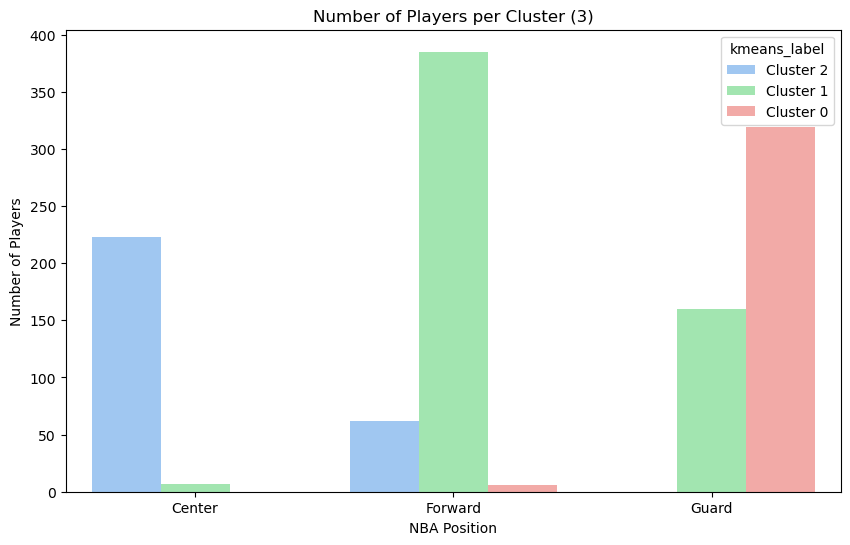

In [88]:
# Plot counts of clusters labels by positions
plt.figure(figsize=(10,6))
plt.style.use('seaborn-pastel')
plt.title('Number of Players per Cluster (3)')
plt.xlabel('NBA Position')
plt.ylabel('Number of Players')
sns.countplot(data=df_kmeans3_, x='POSITION', hue='kmeans_label').set(xlabel='NBA Position', ylabel='Number of Players')
plt.savefig(fname='C:/Users/imdan/downloads/data/3clusters.jpeg')

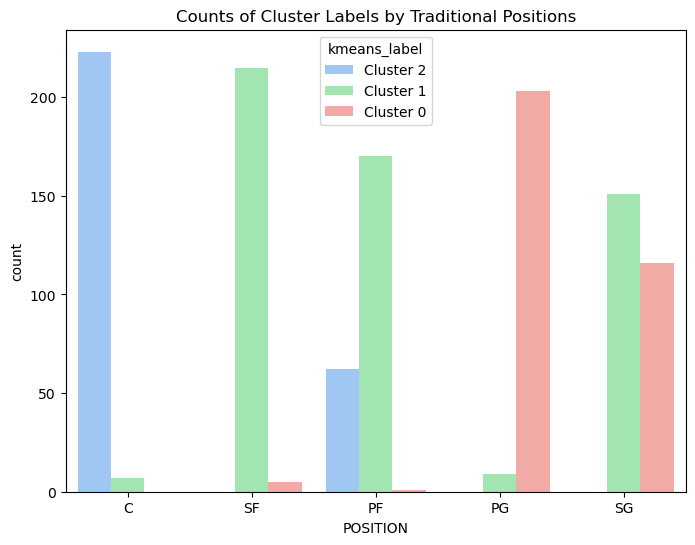

In [89]:
# Plot counts of clusters labels by positions
plt.figure(figsize=(8,6))
plt.title('Counts of Cluster Labels by Traditional Positions')
sns.countplot(data=df_kmeans3, x='POSITION', hue='kmeans_label')
plt.show()

From above, it's clear that for the most part, the clusters are separated similarly to how the traditional positions were separated (mostly by size). Cluster 0 indicated players who are smaller and play like guards (PGs and SGs); Cluster 1 reflects mid-sized wing players (SGs, SFs, PFs) and Cluster 2 highlights bigs (PFs and Cs). The separation is quite clear no Centers (C) in cluster 0.

This was to be expected and not surprising at all. Intuitively, it's clear that players of different sizes are going to show the clearest separation because a player who is a certain size cannot do things like players of a different size.

The next step is where the real analysis begins. Similar to other unsupervised ML projects, because there are no ground truth labels, there are also no true measures of the optimal numbers of clusters. For this project, I will refer back to my business problem and the value that this project will add: identify/sub-segment players into roles that are more clearly defined than the current 5 traditional positions. Consequently, I believe that to add more value, a larger number of clusters is going to be more valuable. Referring back to the graph of silhouette scores earlier, I will proceed with analyzing 7 separate clusters. The reason is that 7 provides me with a high number of segments while also keeping the silhouette score at around 0.38 which is generally considered to indicate good separation.

In [90]:
# 7 clusters
kmeans = KMeans(n_clusters=7, random_state=1, init='k-means++', n_init=100, max_iter=500)
kmeans.fit(X_lda)
kmeans_labels = kmeans.labels_

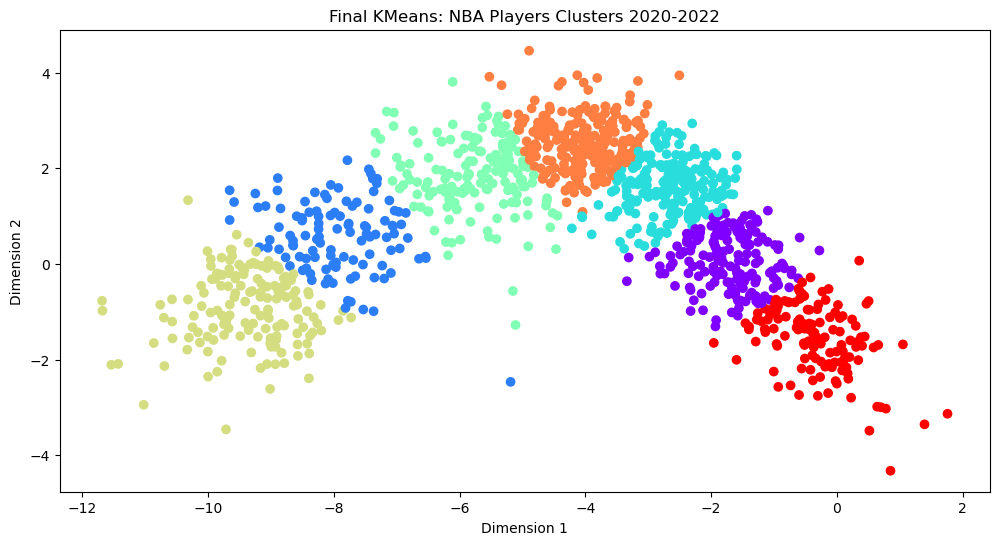

In [95]:
# Plot
plt.figure(figsize=(12,6))
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.scatter(X_lda[:,0], X_lda[:,1], c=kmeans_labels, cmap='rainbow')
plt.title('Final KMeans: NBA Players Clusters 2020-2022')
plt.savefig(fname='C:/Users/imdan/downloads/data/7clusters0.jpeg')

plt.show()

In [96]:
kmeans7_df = X_mm.copy()

# Create labels column
kmeans7_df['kmeans_labels'] = kmeans_labels

# Check clusters' statistical means
grouped_kmeans7 = kmeans7_df.groupby('kmeans_labels', as_index=False).mean().T

In [97]:
grouped_kmeans7

,0,1,2,3,4,5,6
kmeans_labels,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000
PTS,0.304614,0.262831,0.295376,0.273876,0.276721,0.263987,0.369162
FG%,0.289777,0.448524,0.298057,0.369992,0.615222,0.312319,0.294113
3PA,0.319453,0.174634,0.326697,0.239211,0.071484,0.285858,0.341005
3P%,0.351259,0.296241,0.350019,0.336405,0.220497,0.349194,0.350631
...,...,...,...,...,...,...,...
PAINTTOUCH_FG%,0.583665,0.637777,0.619354,0.622222,0.660359,0.620352,0.557938
POSTTOUCH_PTS,0.021191,0.224536,0.028548,0.177136,0.266104,0.066971,0.020136
POSTTOUCH_FG%,0.179659,0.484045,0.204939,0.432051,0.494118,0.302260,0.149838
ELBOWTOUCH_PTS,0.096285,0.378362,0.139737,0.254786,0.481717,0.164779,0.082332


In [98]:
grouped_kmeans7.columns = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 
                           'Cluster 6']

grouped_kmeans7['variance'] = grouped_kmeans7.var(axis=1)

grouped_kmeans7_sorted = grouped_kmeans7.drop('kmeans_labels', axis=0).sort_values(by='variance', ascending=False).head(20)

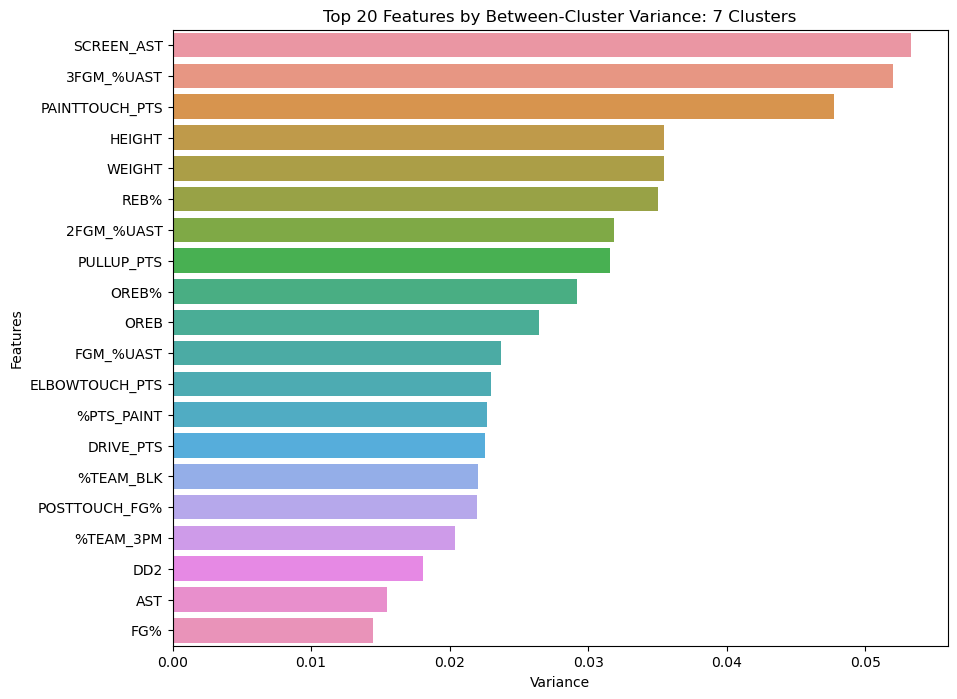

In [99]:
plt.figure(figsize=(10,8))
sns.barplot(x=grouped_kmeans7_sorted['variance'], y=grouped_kmeans7_sorted.index)
plt.title('Top 20 Features by Between-Cluster Variance: 7 Clusters')
plt.xlabel('Variance')
plt.ylabel('Features')
plt.savefig(fname='C:/Users/imdan/downloads/data/report_1.jpeg')

In [100]:
# Create rankings
ranked_kmeans7 = kmeans7_df.groupby('kmeans_labels', as_index=False).mean().rank(method='max').T

ranked_kmeans7.columns = ['Cluster 0' , 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6']

ranked_kmeans7 = ranked_kmeans7.drop('kmeans_labels', axis=0)

ranked_kmeans7

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6
PTS,6.0,1.0,5.0,3.0,4.0,2.0,7.0
FG%,1.0,6.0,3.0,5.0,7.0,4.0,2.0
3PA,5.0,2.0,6.0,3.0,1.0,4.0,7.0
3P%,7.0,2.0,5.0,3.0,1.0,4.0,6.0
FT%,6.0,2.0,5.0,3.0,1.0,4.0,7.0
...,...,...,...,...,...,...,...
PAINTTOUCH_FG%,2.0,6.0,3.0,5.0,7.0,4.0,1.0
POSTTOUCH_PTS,2.0,6.0,3.0,5.0,7.0,4.0,1.0
POSTTOUCH_FG%,2.0,6.0,3.0,5.0,7.0,4.0,1.0
ELBOWTOUCH_PTS,2.0,6.0,3.0,5.0,7.0,4.0,1.0


# Feature Importance

Before moving on to analyzing the individual clusters separately, I want to explore which features are the most important when determining these clusters. A big shortcoming of the KMeans algorithm is that all the feature dimensions are weighed equally. In order to get an idea of which features are more relevant when determining the 7 found clusters, I will be training a random forest model with the cluster labels as the target variable. 

This random forest model - provided that a decent accuracy score is achieved - can tell us which features were the most important or 'predictive.'

In [101]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn import set_config

# Initialize estimator - random forest classifier
estimators = [('normalise', MinMaxScaler()),
              ('rfc', RandomForestClassifier())]

# Initialize pipeline
pipe = Pipeline(estimators)

In [102]:
# Initial gridsearchCV to test for best model hyperparameters
from sklearn.model_selection import GridSearchCV
from tempfile import mkdtemp
cachedir = mkdtemp()

pipe = Pipeline(estimators, memory = cachedir)

params = {'normalise': [MinMaxScaler()],
          'rfc__n_estimators': [25, 50, 75, 100, 125, 150, 175, 200],
          'rfc__max_depth': [3, 5, 7, 9], 
          'rfc__min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8],
          'rfc__max_features': ['sqrt', 'log2', None, 0.2]}

grid_search = GridSearchCV(pipe, param_grid=params)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=12)
    
fitted_search = grid_search.fit(X_train, y_train)

In [103]:
# Best hyperparameter values
fitted_search.best_params_

{'normalise': MinMaxScaler(),
 'rfc__max_depth': 9,
 'rfc__max_features': 0.2,
 'rfc__min_samples_leaf': 1,
 'rfc__n_estimators': 125}

In [104]:
# Best score
fitted_search.best_score_

0.8020099255583126

In [105]:
# Gridsearch 2
estimators = [('normalise', MinMaxScaler()),
              ('rfc', RandomForestClassifier(max_depth=9))]

pipe = Pipeline(estimators)

cachedir = mkdtemp()

pipe = Pipeline(estimators, memory = cachedir)

params = {'normalise': [MinMaxScaler()],
          'rfc__n_estimators': [200, 250, 300, 350, 400, 450, 500],
          'rfc__max_features': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]}

grid_search = GridSearchCV(pipe, param_grid=params)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=12)
    
fitted_search = grid_search.fit(X_train, y_train)

In [106]:
fitted_search.best_params_

{'normalise': MinMaxScaler(),
 'rfc__max_features': 0.3,
 'rfc__n_estimators': 350}

In [107]:
fitted_search.best_score_

0.8020430107526881

With a best accuracy score of around 80% achieved - I will train the random forest model now. I will also be adding min_samples_leaf=10 semi-arbitrarily in order to limit overfitting.

In [110]:
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.33, random_state=12)

mm_scaler = MinMaxScaler()
mm_scaler.fit_transform(X_train)
mm_scaler.transform(X_validation)

rfc = RandomForestClassifier(n_estimators=200, max_depth=9, max_features=0.2, min_samples_leaf=10)

rfc.fit(X_train, y_train)

print(f"Train score: {rfc.score(X_train, y_train)}")
print(f"Validation score: {rfc.score(X_validation, y_validation)}")

Train score: 0.890745501285347
Validation score: 0.7395833333333334


<Figure size 1500x600 with 0 Axes>

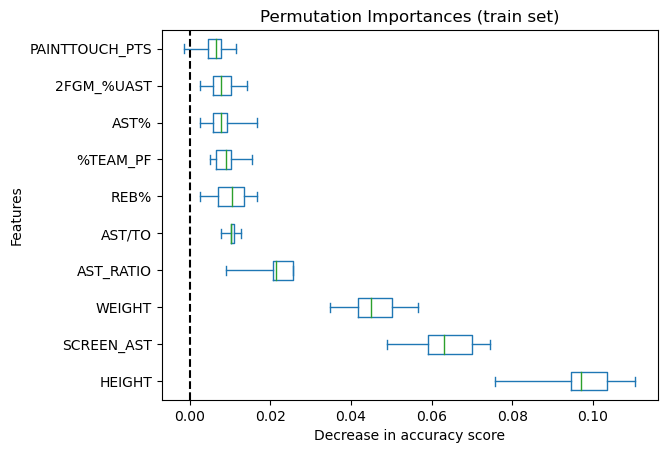

In [111]:
from sklearn.inspection import permutation_importance

# Code retrieved and modified from sklearn documentation
result = permutation_importance(
    rfc, X_train, y_train, n_repeats=10, random_state=42, n_jobs=2
)

sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X.columns[sorted_importances_idx],
)

importance = importances.T
importance[10] = np.mean(importance, axis=1)
importance_t10 = importance.sort_values(by=10, ascending=False).head(10).T

plt.style.use('default')
plt.figure(figsize=(15, 6))
ax = importance_t10.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (train set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.set_ylabel("Features")
plt.savefig(fname='C:/Users/imdan/downloads/data/feature_importance1.jpeg')

In [113]:
# Checking if any features had 0 impact (training set)
importance.loc[importance[10] == 0]

,0,1,2,3,4,5,6,7,8,9,10
TD3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DD2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
%LOOSE_RECOVERED_DEF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TS%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Looking mostly at the training set, it was interesting that height wasn't the most predictive as screen_assist was just higher. It is a bit difficult to interpret why that is but it may be that since there are multiple clusters/groups of "big" players now and one way that they are being differentiated is through screen assists.

More interesting features that were also importance were the following:
- 2FGM_%UAST (% of 2pt field goals that were unassisted by another player)
- %TEAM_PF (% of team's personal fouls committed)

Lastly, it was interesting to see that true shooting % had no affect on the model accuracy scores.

# Cluster Analysis

In [116]:
# Examine Cluster 0
print(grouped_kmeans7['Cluster 0'].sort_values(ascending=False).head(15))
print()
print(grouped_kmeans7['Cluster 0'].sort_values(ascending=True).head(15))

3FGM_%AST               0.786124
AST%                    0.736147
FT%                     0.693569
3FGM_%UAST              0.606477
NETRTG                  0.602491
%PTS_MidRange           0.595300
2FGM_%UAST              0.583959
PAINTTOUCH_FG%          0.583665
OFFRTG                  0.570008
ELBOWTOUCH_FG%          0.564206
%LOOSE_RECOVERED_DEF    0.547912
%TEAM_BLK               0.541744
AST                     0.529781
FGM_%UAST               0.520414
%TEAM_3PM               0.492985
Name: Cluster 0, dtype: float64

kmeans_labels     0.000000
POSTTOUCH_PTS     0.021191
TD3               0.024971
ELBOWTOUCH_PTS    0.096285
SCREEN_AST        0.096968
CHARGES_DRAWN     0.113530
CONTEST_2PT       0.118570
DD2               0.145460
PAINTTOUCH_PTS    0.148401
BLK               0.155638
REB%              0.160784
2ND_PTS           0.173190
REB               0.174444
POSTTOUCH_FG%     0.179659
PAINT_PTS         0.194118
Name: Cluster 0, dtype: float64


In [117]:
df_kmeans7 = df.copy()
df_kmeans7['kmeans_label'] = kmeans_labels

In [118]:
df_kmeans7.loc[df_kmeans7['kmeans_label'] == 0].head(50)

,PLAYER,TEAM,AGE,GP,PTS,FGM,FGA,FG%,3PM,3PA,...,CATCHSHOOT_FG%,PULLUP_PTS,PULLUP_FG%,PAINTTOUCH_PTS,PAINTTOUCH_FG%,POSTTOUCH_PTS,POSTTOUCH_FG%,ELBOWTOUCH_PTS,ELBOWTOUCH_FG%,kmeans_label
LeBronJames|2020,LeBronJames,LAL,35,67,25.3,9.6,19.4,49.3,2.2,6.3,...,38.0,5.9,33.0,2.3,68.3,1.8,55.7,1.0,61.4,0
LukaDoncic|2022,LukaDoncic,DAL,23,65,28.4,9.9,21.6,45.7,3.1,8.8,...,31.0,12.4,37.5,0.9,69.2,1.8,44.9,0.3,58.3,0
DonovanMitchell|2020,DonovanMitchell,UTA,23,69,24.0,8.7,19.4,44.9,2.5,6.9,...,42.9,8.8,41.0,0.9,76.3,0.0,0.0,0.1,62.5,0
StephenCurry|2021,StephenCurry,GSW,33,63,32.0,10.4,21.7,48.2,5.3,12.7,...,44.5,11.2,42.3,1.1,64.7,0.2,50.0,0.7,82.1,0
ShaiGilgeous-Alexander|2022,ShaiGilgeous-Alexander,OKC,23,56,24.5,8.5,18.8,45.3,1.6,5.3,...,41.2,6.9,35.1,0.6,65.0,0.1,75.0,0.2,66.7,0
ShaiGilgeous-Alexander|2020,ShaiGilgeous-Alexander,OKC,21,70,19.0,6.8,14.5,47.1,1.2,3.6,...,38.5,5.7,43.7,0.6,73.1,0.0,100.0,0.4,78.6,0
BradleyBeal|2022,BradleyBeal,WAS,29,40,23.2,8.7,19.3,45.1,1.6,5.3,...,28.7,7.4,41.0,1.5,65.8,0.2,50.0,1.1,50.0,0
De'AaronFox|2022,De'AaronFox,SAC,24,59,23.2,8.7,18.5,47.3,1.3,4.2,...,34.4,7.7,40.4,0.4,66.7,0.2,44.4,0.3,60.0,0
CJMcCollum|2022,CJMcCollum,NOP,30,62,22.1,8.6,18.8,46.0,2.9,7.6,...,44.1,9.9,43.0,0.5,68.2,0.1,100.0,0.4,52.4,0
CJMcCollum|2021,CJMcCollum,POR,29,47,23.1,8.6,18.8,45.8,3.6,8.9,...,48.0,11.2,41.9,0.4,44.4,0.0,0.0,0.2,42.9,0


In [119]:
print(ranked_kmeans7.loc[ranked_kmeans7['Cluster 0'] == 7.0, 'Cluster 0'])
print()
print(ranked_kmeans7.loc[ranked_kmeans7['Cluster 0'] == 1.0, 'Cluster 0'])

3P%          7.0
%TEAM_3PM    7.0
8-16_FG%     7.0
Name: Cluster 0, dtype: float64

FG%         1.0
OREB        1.0
REB         1.0
2ND_PTS     1.0
<8FT_FG%    1.0
Name: Cluster 0, dtype: float64


Cluster 0 key characteristics:
- Excellent shot creation (2FGM_%UAST, 3FGM_%AUST, PULLUP_PTS, PULLUP_FG%))
- High scoring (PTS, FT%)
- 2nd best passing cluster (AST, AST%, AST/TO, AST_RATIO)
- Inefficiency (FG%, TS%)
- 3 level scoring (DRIVE_PTS, %PTS_MidRange, 16-24FGM, 8-16_FG%, 3P%)
- High turnover (TOV)
- Bad inside-defensive stats (BLK, REB, CONTEST_2PT)
- High usage (USG%)
- Small in size (Height, Weight)

The label that I will use to describe cluster 0: Offensive-Minded guards.

Notable examples: 
- Stephen Curry (2021)
- Shai Gilgeous-Alexander (2020-2022)
- C.J McCollum (2020-2022)
- Jordan Poole (2020-2022)
- Terry Rozier (2020-2022)

In [120]:
# Examine Cluster 1
print(grouped_kmeans7['Cluster 1'].sort_values(ascending=False).head(15))
print()
print(grouped_kmeans7['Cluster 1'].sort_values(ascending=True).head(15))

kmeans_labels     1.000000
3FGM_%AST         0.872125
%TEAM_BLK         0.817732
HEIGHT            0.711806
OREB%             0.683953
PAINTTOUCH_FG%    0.637777
%PTS_PAINT        0.609471
NETRTG            0.594373
WEIGHT            0.593750
FT%               0.573941
AST%              0.570256
<8FT_FG%          0.566788
TS%               0.565714
ELBOWTOUCH_FG%    0.550348
OFFRTG            0.547462
Name: Cluster 1, dtype: float64

TD3               0.009109
16-24_FGM         0.096613
FASTB_PTS         0.122470
CHARGES_DRAWN     0.137212
PULLUP_PTS        0.146232
AST/TO            0.163880
3PA               0.174634
3FGM_%UAST        0.182388
%PTS_FASTB        0.194149
FGA_BLOCKED       0.210459
DRIVE_PTS         0.222713
POSTTOUCH_PTS     0.224536
CATCHSHOOT_PTS    0.227719
PTS_OFF_TOV       0.236018
8-16_FGA          0.242048
Name: Cluster 1, dtype: float64


In [121]:
df_kmeans7.loc[df_kmeans7['kmeans_label'] == 1].head(50)

,PLAYER,TEAM,AGE,GP,PTS,FGM,FGA,FG%,3PM,3PA,...,CATCHSHOOT_FG%,PULLUP_PTS,PULLUP_FG%,PAINTTOUCH_PTS,PAINTTOUCH_FG%,POSTTOUCH_PTS,POSTTOUCH_FG%,ELBOWTOUCH_PTS,ELBOWTOUCH_FG%,kmeans_label
JoelEmbiid|2022,JoelEmbiid,PHI,28,68,30.6,9.8,19.6,49.9,1.4,3.7,...,40.6,6.5,41.1,5.8,62.3,6.5,47.1,3.6,55.7,1
Karl-AnthonyTowns|2022,Karl-AnthonyTowns,MIN,26,74,24.6,8.7,16.4,52.9,2.0,4.9,...,40.4,1.7,40.0,4.3,62.7,2.6,55.0,2.7,58.5,1
Karl-AnthonyTowns|2021,Karl-AnthonyTowns,MIN,25,50,24.8,8.5,17.5,48.6,2.4,6.3,...,41.0,1.3,27.5,5.5,61.7,4.0,46.8,1.8,55.6,1
AnthonyDavis|2022,AnthonyDavis,LAL,29,40,23.2,9.3,17.4,53.2,0.3,1.8,...,33.3,2.6,31.6,10.1,69.6,3.4,53.2,3.0,45.5,1
AnthonyDavis|2021,AnthonyDavis,LAL,28,36,21.8,8.4,17.0,49.1,0.7,2.8,...,32.7,4.1,37.9,6.5,73.6,5.1,51.0,2.9,63.0,1
AnthonyDavis|2020,AnthonyDavis,LAL,27,62,26.1,8.9,17.7,50.3,1.2,3.5,...,35.3,2.7,36.0,8.2,70.9,4.5,45.2,2.1,59.3,1
KristapsPorzingis|2022,KristapsPorzingis,WAS,26,51,20.2,6.9,15.0,45.9,1.5,4.9,...,34.5,2.5,43.4,6.1,63.9,3.1,46.1,2.4,54.4,1
KristapsPorzingis|2021,KristapsPorzingis,DAL,25,43,20.1,7.6,15.9,47.6,2.3,6.0,...,39.4,2.2,37.0,6.1,62.3,3.5,50.0,1.6,45.5,1
KristapsPorzingis|2020,KristapsPorzingis,DAL,24,57,20.4,7.0,16.4,42.7,2.5,7.1,...,38.2,2.1,30.4,4.8,68.0,2.1,42.0,2.1,56.6,1
BamAdebayo|2022,BamAdebayo,MIA,24,56,19.1,7.3,13.0,55.7,0.0,0.1,...,39.8,1.8,35.3,7.1,67.3,1.9,42.2,2.8,50.4,1


In [122]:
print(ranked_kmeans7.loc[ranked_kmeans7['Cluster 1'] == 6.0, 'Cluster 1'])
print()
print(ranked_kmeans7.loc[ranked_kmeans7['Cluster 1'] == 3.0, 'Cluster 1'])

FG%               6.0
OREB              6.0
REB               6.0
BLK               6.0
PF                6.0
DD2               6.0
HEIGHT            6.0
WEIGHT            6.0
OREB%             6.0
REB%              6.0
TO_RATIO          6.0
TS%               6.0
PIE               6.0
2ND_PTS           6.0
PAINT_PTS         6.0
%PTS_FT           6.0
%PTS_PAINT        6.0
%TEAM_BLK         6.0
%TEAM_PF          6.0
%TEAM_PFDRAWN     6.0
%TEAM_PTS         6.0
SCREEN_AST        6.0
CHARGES_DRAWN     6.0
CONTEST_2PT       6.0
<8FT_FG%          6.0
PAINTTOUCH_PTS    6.0
PAINTTOUCH_FG%    6.0
POSTTOUCH_PTS     6.0
POSTTOUCH_FG%     6.0
ELBOWTOUCH_PTS    6.0
Name: Cluster 1, dtype: float64

FGA_BLOCKED       3.0
%TEAM_STL         3.0
8-16_FG%          3.0
CATCHSHOOT_PTS    3.0
Name: Cluster 1, dtype: float64


Cluster 1 Characteristics:
- Efficiency (FG%, TS%, PIE, <8FT_FG%)
- Second biggest group
- Plays inside offensively (PAINTTOUCH_PTS, POSTTOUCH_PTS, ELBOWTOUCH_PTS, %PTS_PAINT, PAINT_PTS)
- High CONTEST_3PT, PACE, AST% despite size


Label 1 players: Mobile Bigs

Notable Players:
- Karl Anthony Towns (2021-2022)
- Anthony Davis (2020-2022)
- Kristaps Porzingis (2020-2022)
- Christian Wood (2020-2022)
- John Collins (2020-2022)

In [123]:
# Examine Cluster 2
print(grouped_kmeans7['Cluster 2'].sort_values(ascending=False).head(15))
print()
print(grouped_kmeans7['Cluster 2'].sort_values(ascending=True).head(15))

kmeans_labels           2.000000
3FGM_%AST               0.857151
FT%                     0.669133
PAINTTOUCH_FG%          0.619354
AST%                    0.610796
NETRTG                  0.605431
ELBOWTOUCH_FG%          0.585939
OFFRTG                  0.569296
%TEAM_BLK               0.559958
%LOOSE_RECOVERED_DEF    0.548844
%PTS_MidRange           0.532766
OPP_PTS_OFF_TOV         0.503895
3FGM_%UAST              0.503436
%PTS_TO                 0.501308
%TEAM_3PM               0.491494
Name: Cluster 2, dtype: float64

TD3               0.010543
POSTTOUCH_PTS     0.028548
CHARGES_DRAWN     0.077432
SCREEN_AST        0.089212
DD2               0.120864
CONTEST_2PT       0.124337
ELBOWTOUCH_PTS    0.139737
BLK               0.164334
PAINT_PTS         0.177120
REB%              0.177485
16-24_FGM         0.182542
REB               0.186416
2ND_PTS           0.188861
POSTTOUCH_FG%     0.204939
PAINTTOUCH_PTS    0.208887
Name: Cluster 2, dtype: float64


In [124]:
df_kmeans7.loc[df_kmeans7['kmeans_label'] == 2].head(50)

,PLAYER,TEAM,AGE,GP,PTS,FGM,FGA,FG%,3PM,3PA,...,CATCHSHOOT_FG%,PULLUP_PTS,PULLUP_FG%,PAINTTOUCH_PTS,PAINTTOUCH_FG%,POSTTOUCH_PTS,POSTTOUCH_FG%,ELBOWTOUCH_PTS,ELBOWTOUCH_FG%,kmeans_label
LeBronJames|2021,LeBronJames,LAL,36,45,25.0,9.4,18.3,51.3,2.3,6.3,...,35.8,6.9,38.2,2.3,73.8,1.7,45.2,1.3,66.7,2
DeMarDeRozan|2021,DeMarDeRozan,SAS,31,61,21.6,7.5,15.1,49.5,0.3,1.2,...,33.6,6.3,48.8,0.8,62.5,0.9,56.7,0.5,53.8,2
DeMarDeRozan|2020,DeMarDeRozan,SAS,30,68,22.1,8.2,15.4,53.1,0.1,0.5,...,45.1,5.7,44.4,0.8,63.6,0.8,45.7,0.5,53.8,2
DevinBooker|2022,DevinBooker,PHX,25,68,26.8,9.7,20.9,46.6,2.7,7.0,...,42.2,11.9,44.4,1.3,64.3,0.3,42.9,0.9,50.9,2
DevinBooker|2021,DevinBooker,PHX,24,67,25.6,9.3,19.2,48.4,1.9,5.5,...,40.7,9.0,44.3,1.6,60.6,0.8,52.4,1.5,61.4,2
DevinBooker|2020,DevinBooker,PHX,23,70,26.6,9.0,18.3,48.9,2.0,5.7,...,40.2,8.8,42.0,1.9,69.5,1.0,56.8,1.4,61.4,2
ZachLaVine|2022,ZachLaVine,CHI,27,67,24.4,8.4,17.7,47.6,2.8,7.1,...,47.7,7.5,36.7,1.2,75.0,0.2,38.9,0.7,76.7,2
ZachLaVine|2021,ZachLaVine,CHI,26,58,27.4,9.8,19.4,50.7,3.4,8.2,...,45.8,9.3,42.1,1.5,73.5,0.1,16.7,0.8,76.0,2
ZachLaVine|2020,ZachLaVine,CHI,25,60,25.5,9.0,20.0,45.0,3.1,8.1,...,40.2,7.0,35.0,1.6,70.0,0.2,33.3,0.8,67.9,2
PaulGeorge|2022,PaulGeorge,LAC,32,31,24.3,8.6,20.5,42.1,2.9,8.3,...,44.8,9.9,36.3,0.8,76.9,1.2,52.9,1.3,45.5,2


In [125]:
print(ranked_kmeans7.loc[ranked_kmeans7['Cluster 2'] == 7.0, 'Cluster 2'])
print()
print(ranked_kmeans7.loc[ranked_kmeans7['Cluster 2'] == 2.0, 'Cluster 2'])

PACE                    7.0
FASTB_PTS               7.0
%PTS_FASTB              7.0
%PTS_TO                 7.0
%LOOSE_RECOVERED_DEF    7.0
Name: Cluster 2, dtype: float64

REB                    2.0
PF                     2.0
OFFRTG                 2.0
PIE                    2.0
2ND_PTS                2.0
PAINT_PTS              2.0
PF_DRAWN               2.0
%PTS_FT                2.0
%TEAM_PF               2.0
%TEAM_PFDRAWN          2.0
LOOSE_RECOVERED_OFF    2.0
DRIVE_FG%              2.0
Name: Cluster 2, dtype: float64


Cluster 2 Characteristics:
- Fastest-paced players (PACE, FASTB_PTS, %PTS_FASTB, %PTS_TO)
- Outside scoring (3PA, %TEAM_3PM, 3P%, 3FGM_%UAST, CATCHSHOOT_FG%, CATCHSHOOT_PTS)
- 3 level scoring (16-24FGM, DRIVE_PTS)
- Turnover-heavy (TO_RATIO, OPP_PTS_OFF_TOV)
- Medium size
- Lack of inside scoring (%PTS_PAINT, PAINT_PTS, 2ND_PTS, PF_DRAWN)

Cluster 2 Players: Offensive-Minded Perimeter Wings
Notable players: Devin Booker (2020-2022), Zach Lavine (2020-2022), Paul George (2020-2022), Bradley Beal (2020-2021), Anthony Edwards (2021-2022)

In [126]:
# Examine Cluster 3
print(grouped_kmeans7['Cluster 3'].sort_values(ascending=False).head(15))
print()
print(grouped_kmeans7['Cluster 3'].sort_values(ascending=True).head(15))

kmeans_labels           3.000000
3FGM_%AST               0.936354
%TEAM_BLK               0.686088
PAINTTOUCH_FG%          0.622222
FT%                     0.615047
HEIGHT                  0.612869
NETRTG                  0.602677
OFFRTG                  0.577490
ELBOWTOUCH_FG%          0.565785
AST%                    0.564362
OREB%                   0.538915
<8FT_FG%                0.532172
WEIGHT                  0.531947
TS%                     0.525637
%LOOSE_RECOVERED_DEF    0.505418
Name: Cluster 3, dtype: float64

TD3               0.033000
CHARGES_DRAWN     0.098414
16-24_FGM         0.116846
POSTTOUCH_PTS     0.177136
AST/TO            0.188701
FASTB_PTS         0.191456
FGA_BLOCKED       0.207052
CONTEST_2PT       0.209481
PAINT_PTS         0.219733
PULLUP_PTS        0.228528
3PA               0.239211
2ND_PTS           0.242454
ELBOWTOUCH_PTS    0.254786
8-16_FGA          0.258186
BLK               0.258347
Name: Cluster 3, dtype: float64


In [127]:
df_kmeans7.loc[df_kmeans7['kmeans_label'] == 3].head(50)

,PLAYER,TEAM,AGE,GP,PTS,FGM,FGA,FG%,3PM,3PA,...,CATCHSHOOT_FG%,PULLUP_PTS,PULLUP_FG%,PAINTTOUCH_PTS,PAINTTOUCH_FG%,POSTTOUCH_PTS,POSTTOUCH_FG%,ELBOWTOUCH_PTS,ELBOWTOUCH_FG%,kmeans_label
LeBronJames|2022,LeBronJames,LAL,37,56,30.3,11.4,21.8,52.4,2.9,8.0,...,37.7,6.6,37.4,4.4,74.7,2.3,56.7,2.5,82.2,3
GiannisAntetokounmpo|2022,GiannisAntetokounmpo,MIL,27,67,29.9,10.3,18.6,55.3,1.1,3.6,...,35.8,5.5,36.2,6.4,67.1,2.6,53.2,2.4,54.8,3
GiannisAntetokounmpo|2021,GiannisAntetokounmpo,MIL,26,61,28.1,10.3,18.0,56.9,1.1,3.6,...,30.4,4.9,33.8,5.8,75.8,2.7,53.6,3.6,66.1,3
GiannisAntetokounmpo|2020,GiannisAntetokounmpo,MIL,25,63,29.5,10.9,19.7,55.3,1.4,4.7,...,36.8,4.8,33.3,6.2,68.7,2.6,58.0,3.4,57.3,3
KevinDurant|2021,KevinDurant,BKN,32,35,26.9,9.3,17.2,53.7,2.4,5.4,...,49.1,8.9,48.4,0.9,93.3,2.3,54.4,0.8,65.0,3
PascalSiakam|2022,PascalSiakam,TOR,28,68,22.8,8.8,17.8,49.4,1.1,3.2,...,39.1,4.1,39.1,3.2,59.9,1.2,49.3,1.7,57.0,3
PascalSiakam|2021,PascalSiakam,TOR,27,56,21.4,7.8,17.2,45.5,1.3,4.4,...,33.8,2.9,34.1,2.8,66.7,1.8,42.9,1.6,62.5,3
PascalSiakam|2020,PascalSiakam,TOR,26,60,22.9,8.3,18.4,45.3,2.2,6.1,...,38.6,4.1,32.5,2.7,65.1,1.9,44.2,1.2,68.9,3
MilesBridges|2021,MilesBridges,CHA,23,66,12.7,4.7,9.4,50.3,1.8,4.4,...,37.4,1.7,38.5,3.0,77.0,0.3,64.7,0.6,57.7,3
JuliusRandle|2022,JuliusRandle,NYK,27,72,20.1,7.1,17.3,41.1,1.7,5.4,...,29.2,5.5,34.6,2.8,60.0,2.0,42.1,1.5,56.2,3


In [129]:
print(ranked_kmeans7.loc[ranked_kmeans7['Cluster 3'] == 7.0, 'Cluster 3'])
print()
print(ranked_kmeans7.loc[ranked_kmeans7['Cluster 3'] == 1.0, 'Cluster 3'])

DEFRTG         7.0
3FGM_%AST      7.0
CONTEST_3PT    7.0
Name: Cluster 3, dtype: float64

LOOSE_RECOVERED_OFF    1.0
Name: Cluster 3, dtype: float64


Cluster 3 Characteristics:
- Great defensive stats (DEFRTG, CONTEST_3PT)
- This group is a bit more unique where they don't rank particularly amazingly/terribly in many categories and instaed is more middle-of-the-pack for a large number of statistics.
- wing/big size (3rd biggest group of players) -> will label as power forwards

Cluster 3: Versatile Power Forwards

Notable players
- Giannis Antetokounmpo (2020-2022)
- LeBron James (2022)
- Pascal Siakam (2020-2022)
- Julius Randle (2020-2022)
- Carmelo Anthony (2020-2022)

In [130]:
# Examine Cluster 4
print(grouped_kmeans7['Cluster 4'].sort_values(ascending=False).head(15))
print()
print(grouped_kmeans7['Cluster 4'].sort_values(ascending=True).head(15))

kmeans_labels     4.000000
%TEAM_BLK         0.873703
%PTS_PAINT        0.782610
OREB%             0.779700
HEIGHT            0.758533
WEIGHT            0.705882
PAINTTOUCH_PTS    0.704439
SCREEN_AST        0.668441
TS%               0.666440
PAINTTOUCH_FG%    0.660359
3FGM_%AST         0.656536
OREB              0.651410
REB%              0.632198
NETRTG            0.629497
FG%               0.615222
Name: Cluster 4, dtype: float64

TD3               0.038583
3PA               0.071484
CHARGES_DRAWN     0.084706
PULLUP_PTS        0.085168
16-24_FGM         0.087827
FASTB_PTS         0.092593
%TEAM_3PM         0.102884
3FGM_%UAST        0.103660
CATCHSHOOT_PTS    0.131308
DRIVE_PTS         0.141850
AST/TO            0.144144
%PTS_FASTB        0.146207
FGA_BLOCKED       0.219110
PTS_OFF_TOV       0.220126
3P%               0.220497
Name: Cluster 4, dtype: float64


In [131]:
df_kmeans7.loc[df_kmeans7['kmeans_label'] == 4].head(50)

,PLAYER,TEAM,AGE,GP,PTS,FGM,FGA,FG%,3PM,3PA,...,CATCHSHOOT_FG%,PULLUP_PTS,PULLUP_FG%,PAINTTOUCH_PTS,PAINTTOUCH_FG%,POSTTOUCH_PTS,POSTTOUCH_FG%,ELBOWTOUCH_PTS,ELBOWTOUCH_FG%,kmeans_label
JoelEmbiid|2021,JoelEmbiid,PHI,27,51,28.5,9.0,17.6,51.3,1.1,3.0,...,43.7,5.3,45.6,5.5,62.0,8.6,56.6,2.3,53.4,4
JoelEmbiid|2020,JoelEmbiid,PHI,26,51,23.0,7.5,15.7,47.7,1.1,3.4,...,38.9,2.5,33.0,7.0,65.7,7.4,53.0,2.1,43.5,4
NikolaJokic|2022,NikolaJokic,DEN,27,74,27.1,10.3,17.7,58.3,1.3,3.9,...,41.4,1.4,44.8,9.3,70.3,5.3,62.5,4.7,64.9,4
NikolaJokic|2021,NikolaJokic,DEN,26,72,26.4,10.2,18.0,56.6,1.3,3.3,...,46.7,2.1,46.7,7.1,70.5,5.6,57.7,4.6,58.0,4
NikolaJokic|2020,NikolaJokic,DEN,25,73,19.9,7.7,14.7,52.8,1.1,3.5,...,41.0,1.6,38.2,5.5,71.7,4.0,53.5,4.1,58.1,4
Karl-AnthonyTowns|2020,Karl-AnthonyTowns,MIN,24,35,26.5,9.0,17.8,50.8,3.3,7.9,...,41.0,2.2,34.6,6.0,66.9,4.4,52.8,1.6,59.0,4
BamAdebayo|2021,BamAdebayo,MIA,23,64,18.7,7.1,12.5,57.0,0.0,0.1,...,44.5,2.3,40.9,7.9,71.0,2.1,48.1,3.1,54.7,4
BamAdebayo|2020,BamAdebayo,MIA,22,72,15.9,6.1,11.0,55.7,0.0,0.2,...,41.1,0.7,29.1,6.6,65.2,1.1,45.2,3.8,56.0,4
DomantasSabonis|2022,DomantasSabonis,SAC,26,62,18.9,7.1,12.5,57.3,0.6,2.0,...,32.3,0.2,15.6,9.2,68.2,1.9,47.4,4.0,62.8,4
DomantasSabonis|2021,DomantasSabonis,IND,25,62,20.3,7.8,14.6,53.5,0.8,2.6,...,33.0,1.0,36.0,8.2,69.5,3.1,48.8,3.4,56.0,4


In [132]:
print(ranked_kmeans7.loc[ranked_kmeans7['Cluster 4'] == 7.0, 'Cluster 4'])
print()
print(ranked_kmeans7.loc[ranked_kmeans7['Cluster 4'] == 1.0, 'Cluster 4'])

FG%               7.0
OREB              7.0
REB               7.0
BLK               7.0
PF                7.0
DD2               7.0
HEIGHT            7.0
WEIGHT            7.0
NETRTG            7.0
OREB%             7.0
REB%              7.0
TO_RATIO          7.0
TS%               7.0
PIE               7.0
2ND_PTS           7.0
PAINT_PTS         7.0
%PTS_FT           7.0
%PTS_PAINT        7.0
%TEAM_BLK         7.0
%TEAM_PF          7.0
%TEAM_PFDRAWN     7.0
SCREEN_AST        7.0
CONTEST_2PT       7.0
<8FT_FG%          7.0
DRIVE_FG%         7.0
PAINTTOUCH_PTS    7.0
PAINTTOUCH_FG%    7.0
POSTTOUCH_PTS     7.0
POSTTOUCH_FG%     7.0
ELBOWTOUCH_PTS    7.0
Name: Cluster 4, dtype: float64

3PA                     1.0
3P%                     1.0
FT%                     1.0
STL                     1.0
DEFRTG                  1.0
AST%                    1.0
AST/TO                  1.0
AST_RATIO               1.0
PACE                    1.0
PTS_OFF_TOV             1.0
FASTB_PTS               1.0

Cluster 4 Characteristics:
- Efficient (FG%, TS%)
- Biggest Players
- Worst shot-creation (unassisted fgs)
- Best "traditional bigs" stats (BLK, REB, 2ND_PTS, %PTS_FT, %PTS_BLK)
- Lack of outside scoring (3PA, 3P%, %PTS_MidRange)

Cluster 4 players: Stationary Interior Bigs


Notable Players:
- Joel Embiid (2020-2021)
- Nikola Jokic (2020-2022)
- Domantas Sabonis (2020-2022)
- Jonas Valanciunas (2020-2022)
- Bam Adebayo (2020-2021)

In [133]:
# Examine Cluster 5
print(grouped_kmeans7['Cluster 5'].sort_values(ascending=False).head(15))
print()
print(grouped_kmeans7['Cluster 5'].sort_values(ascending=True).head(15))

kmeans_labels           5.000000
3FGM_%AST               0.918859
FT%                     0.645058
PAINTTOUCH_FG%          0.620352
%TEAM_BLK               0.618994
NETRTG                  0.609696
OFFRTG                  0.577484
ELBOWTOUCH_FG%          0.557498
AST%                    0.542767
HEIGHT                  0.537690
<8FT_FG%                0.509505
%LOOSE_RECOVERED_DEF    0.507877
%PTS_TO                 0.499277
TS%                     0.489421
DEFRTG                  0.486123
Name: Cluster 5, dtype: float64

TD3               0.008871
POSTTOUCH_PTS     0.066971
CHARGES_DRAWN     0.080887
SCREEN_AST        0.127951
16-24_FGM         0.134671
CONTEST_2PT       0.155106
ELBOWTOUCH_PTS    0.164779
DD2               0.166789
PAINT_PTS         0.173202
AST/TO            0.195860
FGA_BLOCKED       0.196979
BLK               0.198532
2ND_PTS           0.206879
%TEAM_PFDRAWN     0.218666
REB               0.227229
Name: Cluster 5, dtype: float64


In [134]:
df_kmeans7.loc[df_kmeans7['kmeans_label'] == 5].head(50)

,PLAYER,TEAM,AGE,GP,PTS,FGM,FGA,FG%,3PM,3PA,...,CATCHSHOOT_FG%,PULLUP_PTS,PULLUP_FG%,PAINTTOUCH_PTS,PAINTTOUCH_FG%,POSTTOUCH_PTS,POSTTOUCH_FG%,ELBOWTOUCH_PTS,ELBOWTOUCH_FG%,kmeans_label
KevinDurant|2022,KevinDurant,BKN,33,55,29.9,10.5,20.3,51.8,2.1,5.5,...,49.6,12.3,48.8,2.0,66.2,2.1,59.2,2.6,62.4,5
DeMarDeRozan|2022,DeMarDeRozan,CHI,32,76,27.9,10.2,20.2,50.4,0.7,1.9,...,38.9,11.9,49.1,1.0,64.6,1.3,49.2,1.0,46.6,5
JaysonTatum|2022,JaysonTatum,BOS,24,76,26.9,9.3,20.6,45.3,3.0,8.6,...,38.4,7.4,35.1,2.2,60.9,1.0,48.4,1.3,55.4,5
JaysonTatum|2021,JaysonTatum,BOS,23,64,26.4,9.5,20.6,45.9,2.9,7.6,...,44.6,8.8,35.8,2.3,61.2,1.6,42.6,1.3,52.3,5
JaysonTatum|2020,JaysonTatum,BOS,22,66,23.4,8.4,18.6,45.0,2.9,7.1,...,39.7,8.6,40.0,1.4,48.2,0.8,34.0,1.0,52.8,5
JaylenBrown|2021,JaylenBrown,BOS,24,58,24.7,9.3,19.2,48.4,2.8,7.1,...,43.7,6.2,42.5,2.1,58.3,0.6,35.9,0.7,54.1,5
JaylenBrown|2020,JaylenBrown,BOS,23,57,20.3,7.5,15.6,48.1,2.3,5.9,...,42.2,3.6,37.9,2.3,62.2,0.8,54.5,0.7,54.8,5
BrandonIngram|2022,BrandonIngram,NOP,24,55,22.7,8.2,17.9,46.1,1.3,4.1,...,40.6,7.3,43.6,1.1,66.7,0.8,44.7,1.3,47.5,5
BrandonIngram|2021,BrandonIngram,NOP,23,61,23.8,8.4,18.0,46.6,2.3,6.1,...,41.9,8.8,43.1,0.6,57.7,0.4,69.2,0.7,58.6,5
BrandonIngram|2020,BrandonIngram,NOP,22,62,23.8,8.2,17.7,46.3,2.4,6.2,...,40.9,4.9,38.8,1.3,65.2,0.5,41.4,0.5,56.5,5


In [135]:
print(ranked_kmeans7.loc[ranked_kmeans7['Cluster 5'] == 6.0, 'Cluster 5'])
print()
print(ranked_kmeans7.loc[ranked_kmeans7['Cluster 5'] == 2.0, 'Cluster 5'])

PACE           6.0
%PTS_FASTB     6.0
%PTS_TO        6.0
3FGM_%AST      6.0
CONTEST_3PT    6.0
Name: Cluster 5, dtype: float64

PTS               2.0
AST%              2.0
TO_RATIO          2.0
CHARGES_DRAWN     2.0
8-16_FGA          2.0
ELBOWTOUCH_FG%    2.0
Name: Cluster 5, dtype: float64


Cluster 5 Characteristics:
- Highest CATCHSHOOT_PTS (also 3FGM_%AST)
- Fast-paced play (PACE, %PTS_FASTB, %PTS_TO)
- Lowest usage group (USG%, TOV)
- Low scoring (PTS, %TEAM_PTS)
- Second highest CONTEST_3PT
- Wing-sized

Cluster 5: 3-D Wings

Notable Players:
- Jayson Tatum (2020-2022)
- Kevin Durant (2022)
- Jaylen Brown (2020-2021)
- Jimmy Butler (2020, 2022)
- Klay Thompson (2022)

In [136]:
# Examine Cluster 6
print(grouped_kmeans7['Cluster 6'].sort_values(ascending=False).head(15))
print()
print(grouped_kmeans7['Cluster 6'].sort_values(ascending=True).head(15))

kmeans_labels     6.000000
AST%              0.840818
3FGM_%UAST        0.733550
2FGM_%UAST        0.713976
FT%               0.708092
FGM_%UAST         0.682806
AST               0.663145
3FGM_%AST         0.662254
NETRTG            0.626178
%PTS_MidRange     0.617662
OFFRTG            0.603239
ELBOWTOUCH_FG%    0.592754
DRIVE_PTS         0.578575
PULLUP_PTS        0.575461
PAINTTOUCH_FG%    0.557938
Name: Cluster 6, dtype: float64

POSTTOUCH_PTS     0.020136
ELBOWTOUCH_PTS    0.082332
TD3               0.092666
SCREEN_AST        0.102131
CONTEST_2PT       0.105229
PAINTTOUCH_PTS    0.114410
BLK               0.131167
POSTTOUCH_FG%     0.149838
CHARGES_DRAWN     0.154188
REB%              0.154879
WEIGHT            0.188523
2ND_PTS           0.191420
REB               0.195166
CATCHSHOOT_PTS    0.214414
OREB              0.227438
Name: Cluster 6, dtype: float64


In [137]:
df_kmeans7.loc[df_kmeans7['kmeans_label'] == 6].head(50)

,PLAYER,TEAM,AGE,GP,PTS,FGM,FGA,FG%,3PM,3PA,...,CATCHSHOOT_FG%,PULLUP_PTS,PULLUP_FG%,PAINTTOUCH_PTS,PAINTTOUCH_FG%,POSTTOUCH_PTS,POSTTOUCH_FG%,ELBOWTOUCH_PTS,ELBOWTOUCH_FG%,kmeans_label
LukaDoncic|2021,LukaDoncic,DAL,22,66,27.7,9.8,20.5,47.9,2.9,8.3,...,33.3,12.1,42.2,0.9,60.5,1.0,57.5,0.1,33.3,6
LukaDoncic|2020,LukaDoncic,DAL,21,61,28.8,9.5,20.6,46.3,2.8,8.9,...,28.2,8.6,33.5,1.6,66.7,0.8,48.4,0.3,70.0,6
TraeYoung|2022,TraeYoung,ATL,23,76,28.4,9.4,20.3,46.0,3.1,8.0,...,46.2,12.7,42.7,0.5,75.0,0.0,0.0,0.1,33.3,6
TraeYoung|2021,TraeYoung,ATL,22,63,25.3,7.7,17.7,43.8,2.2,6.3,...,34.8,9.1,39.0,0.4,73.3,0.0,0.0,0.2,66.7,6
TraeYoung|2020,TraeYoung,ATL,21,60,29.6,9.1,20.8,43.7,3.4,9.5,...,47.3,11.3,38.4,0.4,76.9,0.0,0.0,0.2,71.4,6
JaMorant|2022,JaMorant,MEM,22,57,27.4,10.2,20.6,49.3,1.5,4.5,...,36.8,5.6,37.5,1.8,70.3,0.0,0.0,0.5,70.6,6
JaMorant|2021,JaMorant,MEM,21,63,19.1,6.8,15.2,44.9,1.2,3.8,...,30.6,3.4,34.2,1.7,73.5,0.1,60.0,0.3,42.1,6
JaMorant|2020,JaMorant,MEM,20,67,17.8,6.7,14.0,47.7,0.9,2.7,...,36.2,3.7,37.9,1.5,68.2,0.0,0.0,0.3,81.8,6
DonovanMitchell|2022,DonovanMitchell,UTA,25,67,25.9,9.2,20.5,44.8,3.5,9.8,...,35.8,9.7,39.4,0.7,70.0,0.0,0.0,0.3,71.4,6
DonovanMitchell|2021,DonovanMitchell,UTA,24,53,26.4,9.0,20.6,43.8,3.4,8.7,...,43.1,9.8,39.7,0.6,56.5,0.0,0.0,0.1,33.3,6


In [138]:
print(ranked_kmeans7.loc[ranked_kmeans7['Cluster 6'] == 7.0, 'Cluster 6'])
print()
print(ranked_kmeans7.loc[ranked_kmeans7['Cluster 6'] == 2.0, 'Cluster 6'])

PTS                      7.0
3PA                      7.0
FT%                      7.0
AST                      7.0
TOV                      7.0
STL                      7.0
TD3                      7.0
OFFRTG                   7.0
AST%                     7.0
AST/TO                   7.0
AST_RATIO                7.0
USG%                     7.0
POSS                     7.0
PTS_OFF_TOV              7.0
OPP_PTS_OFF_TOV          7.0
OPP_2ND_PTS              7.0
OPP_FASTB_PTS            7.0
FGA_BLOCKED              7.0
PF_DRAWN                 7.0
%PTS_MidRange            7.0
2FGM_%UAST               7.0
3FGM_%UAST               7.0
FGM_%UAST                7.0
%TEAM_TOV                7.0
%TEAM_STL                7.0
%TEAM_PTS                7.0
LOOSE_RECOVERED_OFF      7.0
LOOSE_RECOVERED_DEF      7.0
LOOSE_RECOVERED_TOTAL    7.0
CHARGES_DRAWN            7.0
8-16_FGA                 7.0
16-24_FGM                7.0
16-24_FG%                7.0
DRIVE_PTS                7.0
CATCHSHOOT_FG%

Cluster 6 Characteristics:
- Highest scoring group (PTS)
- Highest assists and turnovers (AST, TOV, AST%, AST/TO, AST_RATIO)
- Highest usage (USG%, POSS)
- Smallest player group
- Best shot creation (unassisted FGM, PULLUP_PTS, PULLUP_FG%)
- Best hustle stats (CHARGES_DRAWN, LOOSE_RECOVERED_TOTAL, STL)
- Best 3-level scoring (DRIVE_PTS, CATCHSHOOT_FG%, PULLUP_PTS, %PTS_MidRange)

Cluster 6: Floor Generals

Notable players
- Luka Doncic (2020-2021)
- Trae Young (2020-2022)
- Ja Morant (2020-2022)
- Donovan Mitchell (2021-2022)
- James Harden (2020-2022)
- Chris Paul (2020-2022)

In [139]:
df_kmeans7.to_csv('C:/Users/imdan/downloads/data/df_kmeans7.csv')

In [140]:
df_kmeans7.loc[df_kmeans7['kmeans_label'] == 0, 'kmeans_label'] = 'Offensive-Minded Guards'
df_kmeans7.loc[df_kmeans7['kmeans_label'] == 1, 'kmeans_label'] = 'Mobile Bigs'
df_kmeans7.loc[df_kmeans7['kmeans_label'] == 2, 'kmeans_label'] = 'Offensive-Minded Perimeter Wings'
df_kmeans7.loc[df_kmeans7['kmeans_label'] == 3, 'kmeans_label'] = 'Versatile Power Forwards'
df_kmeans7.loc[df_kmeans7['kmeans_label'] == 4, 'kmeans_label'] = 'Stationary Interior Bigs'
df_kmeans7.loc[df_kmeans7['kmeans_label'] == 5, 'kmeans_label'] = '3 and D Wings'
df_kmeans7.loc[df_kmeans7['kmeans_label'] == 6, 'kmeans_label'] = 'Floor Generals'

df_kmeans7.to_csv('C:/Users/imdan/downloads/data/df_kmeans7_final.csv')

One thing to note is that there were a few other models (GMM and Agglomerative) that were experimented with but the silhouette scores did not improve, so they were not examined more deeply -> you can check notebook number 3 to see the results of those other models.

# Recommender

The next thing that I want to do is create a simple recommender system using a KNN model. I will use the KNeighborsClassifier estimator using the labels from the clustering process and optimize for accuracy score. From there, I can create a recommender system based on the nearest neighbors.

In [141]:
df.head()

,PLAYER,TEAM,AGE,GP,PTS,FGM,FGA,FG%,3PM,3PA,...,CATCHSHOOT_PTS,CATCHSHOOT_FG%,PULLUP_PTS,PULLUP_FG%,PAINTTOUCH_PTS,PAINTTOUCH_FG%,POSTTOUCH_PTS,POSTTOUCH_FG%,ELBOWTOUCH_PTS,ELBOWTOUCH_FG%
JoelEmbiid|2022,JoelEmbiid,PHI,28,68,30.6,9.8,19.6,49.9,1.4,3.7,...,4.8,40.6,6.5,41.1,5.8,62.3,6.5,47.1,3.6,55.7
JoelEmbiid|2021,JoelEmbiid,PHI,27,51,28.5,9.0,17.6,51.3,1.1,3.0,...,5.3,43.7,5.3,45.6,5.5,62.0,8.6,56.6,2.3,53.4
JoelEmbiid|2020,JoelEmbiid,PHI,26,51,23.0,7.5,15.7,47.7,1.1,3.4,...,5.2,38.9,2.5,33.0,7.0,65.7,7.4,53.0,2.1,43.5
LeBronJames|2022,LeBronJames,LAL,37,56,30.3,11.4,21.8,52.4,2.9,8.0,...,5.3,37.7,6.6,37.4,4.4,74.7,2.3,56.7,2.5,82.2
LeBronJames|2021,LeBronJames,LAL,36,45,25.0,9.4,18.3,51.3,2.3,6.3,...,3.3,35.8,6.9,38.2,2.3,73.8,1.7,45.2,1.3,66.7


In [142]:
# Create copy of X for KNN

X_knn = X.copy()
X_knn['CLUSTER'] = kmeans_labels
X_knn.head(10)

,PTS,FG%,3PA,3P%,FT%,OREB,REB,AST,TOV,STL,...,CATCHSHOOT_FG%,PULLUP_PTS,PULLUP_FG%,PAINTTOUCH_PTS,PAINTTOUCH_FG%,POSTTOUCH_PTS,POSTTOUCH_FG%,ELBOWTOUCH_PTS,ELBOWTOUCH_FG%,CLUSTER
JoelEmbiid|2022,30.6,49.9,3.7,37.1,81.4,1.131402,11.7,1.648659,1.410987,1.1,...,40.6,2.014903,41.1,1.916923,62.3,2.014903,47.1,1.526056,55.7,1
JoelEmbiid|2021,28.5,51.3,3.0,37.7,85.9,1.163151,10.6,1.335001,1.410987,1.0,...,43.7,1.840550,45.6,1.871802,62.0,2.261763,56.6,1.193922,53.4,4
JoelEmbiid|2020,23.0,47.7,3.4,33.1,80.7,1.335001,11.6,1.386294,1.410987,0.9,...,38.9,1.252763,33.0,2.079442,65.7,2.128232,53.0,1.131402,43.5,4
LeBronJames|2022,30.3,52.4,8.0,35.9,75.6,0.741937,8.2,1.974081,1.504077,1.3,...,37.7,2.028148,37.4,1.686399,74.7,1.193922,56.7,1.252763,82.2,3
LeBronJames|2021,25.0,51.3,6.3,36.5,69.8,0.470004,7.7,2.174752,1.547563,1.1,...,35.8,2.066863,38.2,1.193922,73.8,0.993252,45.2,0.832909,66.7,2
LeBronJames|2020,25.3,49.3,6.3,34.8,69.3,0.693147,7.8,2.415914,1.589235,1.2,...,38.0,1.931521,33.0,1.193922,68.3,1.029619,55.7,0.693147,61.4,0
GiannisAntetokounmpo|2022,29.9,55.3,3.6,29.3,72.2,1.098612,11.6,1.916923,1.458615,1.1,...,35.8,1.871802,36.2,2.001480,67.1,1.280934,53.2,1.223775,54.8,3
GiannisAntetokounmpo|2021,28.1,56.9,3.6,30.3,68.5,0.955511,11.0,1.931521,1.481605,1.2,...,30.4,1.774952,33.8,1.916923,75.8,1.308333,53.6,1.526056,66.1,3
GiannisAntetokounmpo|2020,29.5,55.3,4.7,30.4,63.3,1.163151,13.6,1.887070,1.547563,1.0,...,36.8,1.757858,33.3,1.974081,68.7,1.280934,58.0,1.481605,57.3,3
KevinDurant|2022,29.9,51.8,5.5,38.3,91.0,0.405465,7.4,2.001480,1.504077,0.9,...,49.6,2.587764,48.8,1.098612,66.2,1.131402,59.2,1.280934,62.4,5


In [143]:
X_knn.loc[X_knn['CLUSTER'] == 0, 'CLUSTER'] = 'CLUSTER 0'
X_knn.loc[X_knn['CLUSTER'] == 1, 'CLUSTER'] = 'CLUSTER 1'
X_knn.loc[X_knn['CLUSTER'] == 2, 'CLUSTER'] = 'CLUSTER 2'
X_knn.loc[X_knn['CLUSTER'] == 3, 'CLUSTER'] = 'CLUSTER 3'
X_knn.loc[X_knn['CLUSTER'] == 4, 'CLUSTER'] = 'CLUSTER 4'
X_knn.loc[X_knn['CLUSTER'] == 5, 'CLUSTER'] = 'CLUSTER 5'
X_knn.loc[X_knn['CLUSTER'] == 6, 'CLUSTER'] = 'CLUSTER 6'

In [144]:
# Features and target
X = X_knn.drop('CLUSTER', axis=1)
y = X_knn['CLUSTER']

I will start with a baseline model just to get a sense of the accuracy score.

In [145]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [146]:
X_train = mm_scaler.fit_transform(X_train)
X_test = mm_scaler.transform(X_test)

In [147]:
pca = PCA(n_components=0.75)
pca.fit(X_train)

X_train_PCA = pca.transform(X_train)
X_test_PCA = pca.transform(X_test)

In [148]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


neighbors = range(1, 300, 2)

train_acc = []
test_acc = []

for n in neighbors: 
    #Instantiate and Fit
    KNN_model = KNeighborsClassifier(n_neighbors=n, metric='cosine')
    KNN_model.fit(X_train, y_train)
    
    
    #Score the model
    train_accuracy = KNN_model.score(X_train, y_train)
    test_accuracy = KNN_model.score(X_test, y_test)
    
    
    #Append my accuracy
    train_acc.append(train_accuracy)
    test_acc.append(test_accuracy)

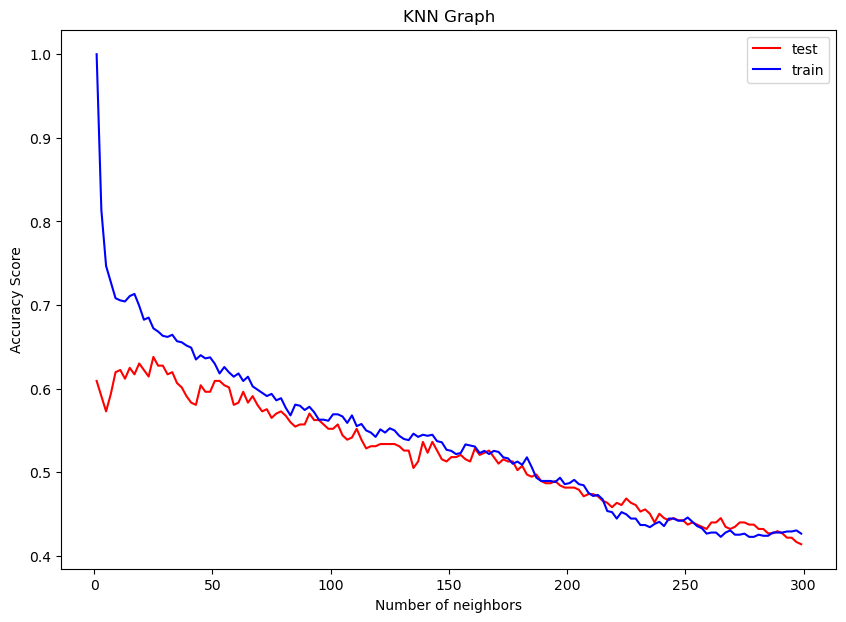

In [149]:
#plot the graph
plt.figure(figsize=(10,7))
plt.plot(neighbors, test_acc, color="red", label="test")
plt.plot(neighbors, train_acc, color="blue", label="train")
plt.ylabel("Accuracy Score")
plt.xlabel("Number of neighbors")
plt.title("KNN Graph")
plt.legend()
plt.show()

We got an accuracy score close to 65% for our testing set. I will now implement a gridsearch in order to optimize hyperparameters and try to get the accuracy score as high as possible.

In [150]:
X = X_knn.drop('CLUSTER', axis=1)
y = X_knn['CLUSTER']

In [151]:
y

JoelEmbiid|2022        CLUSTER 1
JoelEmbiid|2021        CLUSTER 4
JoelEmbiid|2020        CLUSTER 4
LeBronJames|2022       CLUSTER 3
LeBronJames|2021       CLUSTER 2
                         ...    
TreveonGraham|2020     CLUSTER 5
TroyDaniels|2020       CLUSTER 2
VinceCarter|2020       CLUSTER 5
WilsonChandler|2020    CLUSTER 3
YogiFerrell|2020       CLUSTER 6
Name: CLUSTER, Length: 1162, dtype: object

In [152]:
from sklearn.pipeline import Pipeline
from sklearn import set_config

estimators = [('normalise', MinMaxScaler()),
              ('reduce_dim', PCA()),
              ('knn', KNeighborsClassifier(n_jobs=-1))]

pipe = Pipeline(estimators)

#visualize the pipeline
set_config(display ='diagram')
pipe

Pipeline(steps=[('normalise', MinMaxScaler()), ('reduce_dim', PCA()),
                ('knn', KNeighborsClassifier(n_jobs=-1))])

In [153]:
from sklearn.model_selection import GridSearchCV
from tempfile import mkdtemp
cachedir = mkdtemp()

pipe = Pipeline(estimators, memory = cachedir)

params = {'normalise': [MinMaxScaler(), StandardScaler(), RobustScaler()],
          'knn__weights': ['uniform','distance'],
          'knn__n_neighbors': [10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40], 
          'knn__algorithm': ['auto', 'brute'],
          'knn__metric': ['minkowski', 'cosine'],
          'reduce_dim__n_components': [.7, .75, .8, .85, .9]}

grid_search = GridSearchCV(pipe, param_grid=params)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=12)
    
fitted_search = grid_search.fit(X_train, y_train)

In [154]:
fitted_search.best_params_

{'knn__algorithm': 'auto',
 'knn__metric': 'cosine',
 'knn__n_neighbors': 32,
 'knn__weights': 'distance',
 'normalise': MinMaxScaler(),
 'reduce_dim__n_components': 0.75}

In [155]:
fitted_search.best_score_

0.6182547559966916

Accounting for all the significant hyperparameters, the highest score achieved was 0.61 which isn't amazing. Before moving forward, I will try again using LDA as dimensionality reduction.

In [156]:
X = X_knn.drop('CLUSTER', axis=1)
y = X_knn['CLUSTER']

In [157]:
estimators = [('reduce_dim', LDA(solver='eigen')), 
              ('knn', KNeighborsClassifier(metric='cosine'))]

pipe = Pipeline(estimators)

#visualize the pipeline
set_config(display ='diagram')
pipe

Pipeline(steps=[('reduce_dim', LinearDiscriminantAnalysis(solver='eigen')),
                ('knn', KNeighborsClassifier(metric='cosine'))])

In [158]:
cachedir = mkdtemp()

pipe = Pipeline(estimators, memory = cachedir)

params = {'knn__weights': ['uniform','distance'], 
          'knn__algorithm': ['auto', 'brute'],
          'knn__metric': ['minkowski', 'cosine'],
          'knn__n_neighbors': [10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40],
          'reduce_dim__shrinkage': [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009]}

grid_search = GridSearchCV(pipe, param_grid=params)

X = X_knn.drop('CLUSTER', axis=1)
y = df['POSITION']

X_train, X_test, y_train, y_test = train_test_split(X_lda, y, test_size=0.33, random_state=12)
    
fitted_search = grid_search.fit(X_train, y_train)

In [159]:
fitted_search.best_params_

{'knn__algorithm': 'auto',
 'knn__metric': 'minkowski',
 'knn__n_neighbors': 18,
 'knn__weights': 'uniform',
 'reduce_dim__shrinkage': 0.001}

In [160]:
fitted_search.best_score_

0.7840115798180314

With the parameters shown above, I was able to get a score of 0.78 which is significantly better than using PCA again. I will create the recommender system with the parameters above.

In [161]:
# Fit model
X = X_knn.drop('CLUSTER', axis=1)
y = X_knn['CLUSTER']

lda = LDA(solver='eigen', shrinkage=0.001)
lda_fit = lda.fit(X,y)
X_lda = lda_fit.transform(X)

knn = KNeighborsClassifier(n_neighbors=18)

knn_fit = knn.fit(X_lda, y)

In [162]:
knn_fit.score(X_lda, y)

0.7624784853700516

In [163]:
X0 = X.reset_index()

In [164]:
X_final = pd.DataFrame(data=X_lda, index=X0['index'], columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'])

In [165]:
knn_fit.kneighbors(X_final.loc[X_final.index == 'JordanPoole|2022'], n_neighbors=5)[1]

array([[126, 259, 109,  84, 242]], dtype=int64)

In [166]:
knn_fit.kneighbors(X_final.loc[X_final.index == 'JordanPoole|2022'], n_neighbors=5)[0][0][4]

0.848968676894904

In [167]:
def player_recommend(player, n=5):
    players_list = []
    distances = []
    for i in range(n):
        players_list.append(knn_fit.kneighbors(X_final.loc[X_final.index == player], n_neighbors=n)[1][0][i])
        distances.append(knn_fit.kneighbors(X_final.loc[X_final.index == player], n_neighbors=n)[0][0][i])
        
    for player in players_list:
        print(f"player: {X0.iloc[player][0]}")
    for distance in distances:
        print(f"distances: {distance}")

In [168]:
player_recommend('GiannisAntetokounmpo|2022', n=10)

player: GiannisAntetokounmpo|2022
player: GiannisAntetokounmpo|2020
player: GiannisAntetokounmpo|2021
player: ThanasisAntetokounmpo|2022
player: SergeIbaka|2021
player: KevinDurant|2021
player: MontrezlHarrell|2022
player: KevinDurant|2022
player: AnthonyGill|2022
player: GrantWilliams|2020
distances: 0.0
distances: 0.6065660927912081
distances: 0.6293279124829748
distances: 1.6394059814601945
distances: 1.7788522912254685
distances: 1.7845132217211406
distances: 1.8476166752320518
distances: 1.850307338553951
distances: 1.8661572946229241
distances: 1.8909001671255523


To compare my algorithm with another, I will create a simple recommender system using cosine similarity here.

In [182]:
X_practice = X_mm.copy()
X_practice['index'] = X.index

In [175]:
from sklearn.metrics.pairwise import cosine_similarity

In [189]:
player_index = X_practice[X_practice['index'] == 'GiannisAntetokounmpo|2022'].index

In [190]:
similarities = cosine_similarity(X, dense_output=False)

In [191]:
sim_df = pd.DataFrame({'PLAYER':X_practice['index'], 
                       'similarity': np.array(similarities[player_index, :]).squeeze()})

In [192]:
# Return the top 10 most similar players
sim_df.sort_values(by='similarity', ascending=False).head(100)

,PLAYER,similarity
6,GiannisAntetokounmpo|2022,1.000000
7,GiannisAntetokounmpo|2021,0.999946
8,GiannisAntetokounmpo|2020,0.999938
5,LeBronJames|2020,0.999927
49,JaylenBrown|2022,0.999921
...,...,...
104,KhrisMiddleton|2020,0.999789
34,DonovanMitchell|2020,0.999787
51,JaylenBrown|2020,0.999787
1005,CollinSexton|2020,0.999786


With this simple recommender system, we can say that the 2 recommenders output quite different results. There are limitations to both recommender systems. This will be explored further in the analysis report (same github repo).